CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Reading the datasets

df_compli=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop/Hospital_Revised_Flatfiles/Complications - Hospital.csv")

In [3]:
df_compli.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


In [4]:
df_hcahps=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop/Hospital_Revised_Flatfiles/HCAHPS - Hospital.csv",header=0,encoding="unicode_escape")

In [5]:
df_hcahps.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [6]:
df_hci=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop//Hospital_Revised_Flatfiles/Healthcare Associated Infections - Hospital.csv")

In [7]:
df_hci.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117,NaN,1/1/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Predicted Cases,HAI_1_ELIGCASES,NaN,9.198,NaN,1/1/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Observed Cases,HAI_1_NUMERATOR,NaN,16,NaN,1/1/2015,12/31/2015


In [8]:
df_hgi=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop//Hospital_Revised_Flatfiles/Hospital General Information.csv",header=0,encoding="unicode_escape")

In [9]:
df_hgi.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [10]:
df_rad=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop//Hospital_Revised_Flatfiles/Readmissions and Deaths - Hospital.csv")

In [11]:
df_rad.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [12]:
df_taec=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop//Hospital_Revised_Flatfiles/Timely and Effective Care - Hospital.csv")

In [13]:
df_taec.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [14]:
df_opie=pd.read_csv("C:/Users/pavpr/OneDrive/Desktop//Hospital_Revised_Flatfiles/Outpatient Imaging Efficiency - Hospital.csv")

In [15]:
df_opie.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,2.4,NaN,07/01/2014,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,38.1,NaN,07/01/2014,06/30/2015


In [16]:
measure = ['MORT_30_AMI', 'MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP','HAI_1','HAI_2','HAI_3','HAI_4','HAI_5','HAI_6','COMP_HIP_KNEE','PSI_90_SAFETY','READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_PN','READM_30_STK','READM_30_HOSP_WIDE','H_CLEAN_HSP','H_COMP_1','H_COMP_2','H_COMP_3','H_COMP_4','H_COMP_5','H_COMP_6','H_HSP_RATING','H_QUIET_HSP','H_RECMND','H_COMP_7','CAC_3','IMM_2','IMM_3','OP_4','OP_22','OP_23','PC_01','STK_1','STK_4','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6','ED_1b','ED_2b','OP_3','OP_5','OP_18b','OP_20','OP_21','OP_8','OP_10','OP_11','OP_13','OP_14'] 

In [17]:
measure

['MORT_30_AMI',
 'MORT_30_CABG',
 'MORT_30_COPD',
 'MORT_30_HF',
 'MORT_30_PN',
 'MORT_30_STK',
 'PSI_4_SURG_COMP',
 'HAI_1',
 'HAI_2',
 'HAI_3',
 'HAI_4',
 'HAI_5',
 'HAI_6',
 'COMP_HIP_KNEE',
 'PSI_90_SAFETY',
 'READM_30_AMI',
 'READM_30_CABG',
 'READM_30_COPD',
 'READM_30_HF',
 'READM_30_HIP_KNEE',
 'READM_30_PN',
 'READM_30_STK',
 'READM_30_HOSP_WIDE',
 'H_CLEAN_HSP',
 'H_COMP_1',
 'H_COMP_2',
 'H_COMP_3',
 'H_COMP_4',
 'H_COMP_5',
 'H_COMP_6',
 'H_HSP_RATING',
 'H_QUIET_HSP',
 'H_RECMND',
 'H_COMP_7',
 'CAC_3',
 'IMM_2',
 'IMM_3',
 'OP_4',
 'OP_22',
 'OP_23',
 'PC_01',
 'STK_1',
 'STK_4',
 'STK_6',
 'STK_8',
 'VTE_1',
 'VTE_2',
 'VTE_3',
 'VTE_5',
 'VTE_6',
 'ED_1b',
 'ED_2b',
 'OP_3',
 'OP_5',
 'OP_18b',
 'OP_20',
 'OP_21',
 'OP_8',
 'OP_10',
 'OP_11',
 'OP_13',
 'OP_14']

In [18]:
# to get the length of the list

len(measure)

62

In [19]:
df_compli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           52998 non-null  int64 
 1   Hospital Name         52998 non-null  object
 2   Address               52998 non-null  object
 3   City                  52998 non-null  object
 4   State                 52998 non-null  object
 5   ZIP Code              52998 non-null  int64 
 6   County Name           52833 non-null  object
 7   Phone Number          52998 non-null  int64 
 8   Measure Name          52998 non-null  object
 9   Measure ID            52998 non-null  object
 10  Compared to National  52998 non-null  object
 11  Denominator           52998 non-null  object
 12  Score                 52998 non-null  object
 13  Lower Estimate        52998 non-null  object
 14  Higher Estimate       52998 non-null  object
 15  Footnote              21874 non-null

In [20]:
# keeping only Provider ID, Measure ID & Score columns

df_compli=df_compli[["Provider ID","Measure ID","Score"]]

In [21]:
df_compli

,Provider ID,Measure ID,Score
0,10001,COMP_HIP_KNEE,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,3.32
2,10001,PSI_13_POST_SEPSIS,5.72
3,10001,PSI_14_POSTOP_DEHIS,2.72
4,10001,PSI_15_ACC_LAC,1.35
...,...,...,...
52993,670112,PSI_4_SURG_COMP,Not Available
52994,670112,PSI_6_IAT_PTX,Not Available
52995,670112,PSI_7_CVCBI,Not Available
52996,670112,PSI_8_POST_HIP,Not Available


In [22]:
# remove the rows where measure id is blank

df_compli[pd.notnull(df_compli['Measure ID'])]

,Provider ID,Measure ID,Score
0,10001,COMP_HIP_KNEE,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,3.32
2,10001,PSI_13_POST_SEPSIS,5.72
3,10001,PSI_14_POSTOP_DEHIS,2.72
4,10001,PSI_15_ACC_LAC,1.35
...,...,...,...
52993,670112,PSI_4_SURG_COMP,Not Available
52994,670112,PSI_6_IAT_PTX,Not Available
52995,670112,PSI_7_CVCBI,Not Available
52996,670112,PSI_8_POST_HIP,Not Available


In [23]:
df_compli

,Provider ID,Measure ID,Score
0,10001,COMP_HIP_KNEE,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,3.32
2,10001,PSI_13_POST_SEPSIS,5.72
3,10001,PSI_14_POSTOP_DEHIS,2.72
4,10001,PSI_15_ACC_LAC,1.35
...,...,...,...
52993,670112,PSI_4_SURG_COMP,Not Available
52994,670112,PSI_6_IAT_PTX,Not Available
52995,670112,PSI_7_CVCBI,Not Available
52996,670112,PSI_8_POST_HIP,Not Available


In [24]:
# to check the different measures present

df_compli.groupby(["Measure ID"]).size().reset_index(name="counts")

,Measure ID,counts
0,COMP_HIP_KNEE,4818
1,PSI_12_POSTOP_PULMEMB_DVT,4818
2,PSI_13_POST_SEPSIS,4818
3,PSI_14_POSTOP_DEHIS,4818
4,PSI_15_ACC_LAC,4818
5,PSI_3_ULCER,4818
6,PSI_4_SURG_COMP,4818
7,PSI_6_IAT_PTX,4818
8,PSI_7_CVCBI,4818
9,PSI_8_POST_HIP,4818


In [25]:
# filter the values which has valid measure values

df_compli=df_compli.loc[df_compli["Measure ID"].isin(measure)]

In [26]:
# to remove duplicate rows

df_compli.drop_duplicates(keep="first",inplace=True)
df_compli.shape

(14454, 3)

In [27]:
# to get the unique row for the Provider ID

df1 = df_compli.pivot(index='Provider ID',columns='Measure ID',values = 'Score')
df1.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY
Provider ID,,,
10001,3.8,168.26,0.68
10005,3.0,179.05,0.85
10006,3.8,198.33,0.91
10007,Not Available,Not Available,0.79
10008,Not Available,Not Available,0.90


In [28]:
df1.shape

(4818, 3)

In [29]:
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

In [30]:
# only keep provider id & measure id

df_hcahps= df_hcahps[["Provider ID","HCAHPS Measure ID","HCAHPS Linear Mean Value"]]

In [31]:
# removing the null rows

df_hcahps=df_hcahps[pd.notnull(df_hcahps["HCAHPS Measure ID"])]

In [32]:
# checking the maesures in the table

df_hcahps.groupby(["HCAHPS Measure ID"]).size().reset_index(name="counts")

,HCAHPS Measure ID,counts
0,H_CLEAN_HSP_A_P,4818
1,H_CLEAN_HSP_SN_P,4818
2,H_CLEAN_HSP_U_P,4818
3,H_CLEAN_LINEAR_SCORE,4818
4,H_CLEAN_STAR_RATING,4818
5,H_COMP_1_A_P,4818
6,H_COMP_1_LINEAR_SCORE,4818
7,H_COMP_1_SN_P,4818
8,H_COMP_1_STAR_RATING,4818
9,H_COMP_1_U_P,4818


In [33]:
# removing the extra information given in the Measure field

df_hcahps = df_hcahps.replace(['H_CLEAN_HSP_A_P','H_CLEAN_HSP_SN_P','H_CLEAN_HSP_U_P','H_CLEAN_LINEAR_SCORE','H_CLEAN_STAR_RATING'],'H_CLEAN_HSP')
df_hcahps = df_hcahps.replace(['H_COMP_1_A_P','H_COMP_1_LINEAR_SCORE','H_COMP_1_SN_P','H_COMP_1_STAR_RATING','H_COMP_1_U_P'],'H_COMP_1')
df_hcahps = df_hcahps.replace(['H_COMP_2_A_P','H_COMP_2_LINEAR_SCORE','H_COMP_2_SN_P','H_COMP_2_STAR_RATING','H_COMP_2_U_P'],'H_COMP_2')
df_hcahps = df_hcahps.replace(['H_COMP_3_A_P','H_COMP_3_LINEAR_SCORE','H_COMP_3_SN_P','H_COMP_3_STAR_RATING','H_COMP_3_U_P'],'H_COMP_3')
df_hcahps = df_hcahps.replace(['H_COMP_4_A_P','H_COMP_4_LINEAR_SCORE','H_COMP_4_SN_P','H_COMP_4_STAR_RATING','H_COMP_4_U_P'],'H_COMP_4')
df_hcahps = df_hcahps.replace(['H_COMP_5_A_P','H_COMP_5_LINEAR_SCORE','H_COMP_5_SN_P','H_COMP_5_STAR_RATING','H_COMP_5_U_P'],'H_COMP_5')
df_hcahps = df_hcahps.replace(['H_COMP_6_LINEAR_SCORE','H_COMP_6_N_P','H_COMP_6_STAR_RATING','H_COMP_6_Y_P'],'H_COMP_6')
df_hcahps = df_hcahps.replace(['H_COMP_7_A','H_COMP_7_D_SD','H_COMP_7_LINEAR_SCORE','H_COMP_7_SA','H_COMP_7_STAR_RATING'],'H_COMP_7')
df_hcahps = df_hcahps.replace(['H_HSP_RATING_0_6','H_HSP_RATING_7_8','H_HSP_RATING_9_10','H_HSP_RATING_LINEAR_SCORE','H_HSP_RATING_STAR_RATING'],'H_HSP_RATING')
df_hcahps = df_hcahps.replace(['H_QUIET_HSP_A_P','H_QUIET_HSP_SN_P','H_QUIET_HSP_U_P','H_QUIET_LINEAR_SCORE','H_QUIET_STAR_RATING'],'H_QUIET_HSP')
df_hcahps = df_hcahps.replace(['H_RECMND_DN','H_RECMND_DY','H_RECMND_LINEAR_SCORE','H_RECMND_PY','H_RECMND_STAR_RATING'],'H_RECMND')


In [34]:
# filter the table with valid measure values

df_hcahps = df_hcahps.loc[df_hcahps['HCAHPS Measure ID'].isin(measure)]

In [35]:
# remove duplicates rows

df_hcahps = df_hcahps.drop_duplicates(subset=['Provider ID', 'HCAHPS Measure ID'], keep='first')

In [36]:
# shape of the table

df_hcahps.shape

(52998, 3)

In [37]:
df_hcahps = df_hcahps.rename(columns = {"HCAHPS Measure ID": "Measure ID"}) 

In [38]:
df_hcahps.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,H_CLEAN_HSP,4818
1,H_COMP_1,4818
2,H_COMP_2,4818
3,H_COMP_3,4818
4,H_COMP_4,4818
5,H_COMP_5,4818
6,H_COMP_6,4818
7,H_COMP_7,4818
8,H_HSP_RATING,4818
9,H_QUIET_HSP,4818


In [39]:
# to get the unique value for Provider ID

df2 = df_hcahps.pivot(index='Provider ID',columns='Measure ID', values = 'HCAHPS Linear Mean Value')
df2.head()

Measure ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND
Provider ID,,,,,,,,,,,
10001,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,87,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10005,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,88,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10006,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,83,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10007,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,86,Not Applicable,Not Applicable,Not Applicable,Not Applicable
10008,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [40]:
df2.shape

(4818, 11)

In [41]:
df_hci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Address               231264 non-null  object
 3   City                  231264 non-null  object
 4   State                 231264 non-null  object
 5   ZIP Code              231264 non-null  int64 
 6   County Name           230544 non-null  object
 7   Phone Number          231264 non-null  int64 
 8   Measure Name          231264 non-null  object
 9   Measure ID            231264 non-null  object
 10  Compared to National  38544 non-null   object
 11  Score                 231264 non-null  object
 12  Footnote              103373 non-null  object
 13  Measure Start Date    231264 non-null  object
 14  Measure End Date      231264 non-null  object
dtypes: int64(3), obje

In [42]:
df_hci=df_hci[["Provider ID","Measure ID","Score"]]
df_hci.shape

(231264, 3)

In [43]:
df_hci.groupby(["Measure ID"]).size().reset_index(name="count")

,Measure ID,count
0,HAI_1_CI_LOWER,4818
1,HAI_1_CI_UPPER,4818
2,HAI_1_DOPC_DAYS,4818
3,HAI_1_ELIGCASES,4818
4,HAI_1_NUMERATOR,4818
5,HAI_1_SIR,4818
6,HAI_1a_CI_LOWER,4818
7,HAI_1a_CI_UPPER,4818
8,HAI_1a_DOPC_DAYS,4818
9,HAI_1a_ELIGCASES,4818


In [44]:
# to remove the extra information

df_hci = df_hci.replace(['HAI_1_CI_LOWER','HAI_1_CI_UPPER','HAI_1_DOPC_DAYS','HAI_1_ELIGCASES','HAI_1_NUMERATOR','HAI_1_SIR','HAI_1a_CI_LOWER','HAI_1a_CI_UPPER','HAI_1a_DOPC_DAYS','HAI_1a_ELIGCASES','HAI_1a_NUMERATOR','HAI_1a_SIR'],'HAI_1')
df_hci = df_hci.replace(['HAI_2_CI_LOWER','HAI_2_CI_UPPER','HAI_2_DOPC_DAYS','HAI_2_ELIGCASES','HAI_2_NUMERATOR','HAI_2_SIR','HAI_2a_CI_LOWER','HAI_2a_CI_UPPER','HAI_2a_DOPC_DAYS','HAI_2a_ELIGCASES','HAI_2a_NUMERATOR','HAI_2a_SIR'],'HAI_2')
df_hci = df_hci.replace(['HAI_3_CI_LOWER','HAI_3_CI_UPPER','HAI_3_DOPC_DAYS','HAI_3_ELIGCASES','HAI_3_NUMERATOR','HAI_3_SIR'],'HAI_3')
df_hci = df_hci.replace(['HAI_4_CI_LOWER','HAI_4_CI_UPPER','HAI_4_DOPC_DAYS','HAI_4_ELIGCASES','HAI_4_NUMERATOR','HAI_4_SIR'],'HAI_4')
df_hci = df_hci.replace(['HAI_5_CI_LOWER','HAI_5_CI_UPPER','HAI_5_DOPC_DAYS','HAI_5_ELIGCASES','HAI_5_NUMERATOR','HAI_5_SIR'],'HAI_5')
df_hci = df_hci.replace(['HAI_6_CI_LOWER','HAI_6_CI_UPPER','HAI_6_DOPC_DAYS','HAI_6_ELIGCASES','HAI_6_NUMERATOR','HAI_6_SIR'],'HAI_6')


In [45]:
# lets remove duplicates and null rows

df_hci = df_hci[pd.notnull(df_hci['Measure ID'])]

df_hci = df_hci.drop_duplicates(subset=['Provider ID', 'Measure ID'], keep='first')


In [46]:
# to get the values with Measure ID 

df_hci = df_hci.loc[df_hci['Measure ID'].isin(measure)]

In [47]:
# to get the unique row for Provider ID

df3 = df_hci.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df3.head()

Measure ID,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,
10001,1.03,0.974,0.95,Not Available,0.107,0.562
10005,0.337,0.167,0.019,Not Available,0.233,0.177
10006,0.138,0.373,0.016,Not Available,0.401,0.309
10007,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10008,Not Available,Not Available,Not Available,Not Available,Not Available,0.029


In [48]:
df3.shape

(4818, 6)

In [49]:
df_opie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         28908 non-null  int64 
 1   Hospital Name       28908 non-null  object
 2   Address             28908 non-null  object
 3   City                28908 non-null  object
 4   State               28908 non-null  object
 5   ZIP Code            28908 non-null  int64 
 6   County Name         28818 non-null  object
 7   Phone Number        28908 non-null  int64 
 8   Measure ID          28908 non-null  object
 9   Measure Name        28908 non-null  object
 10  Score               28908 non-null  object
 11  Footnote            12595 non-null  object
 12  Measure Start Date  28908 non-null  object
 13  Measure End Date    28908 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [50]:
# keep only Provider ID & mEASURE ID

df_opie = df_opie[['Provider ID','Measure ID','Score']]
df_opie.shape

(28908, 3)

In [51]:
# validate the valid values

df_opie.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,OP_10,4818
1,OP_11,4818
2,OP_13,4818
3,OP_14,4818
4,OP_8,4818
5,OP_9,4818


In [52]:
# filtering the invalid measures

df_opie = df_opie.loc[df_opie['Measure ID'].isin(measure)]

In [53]:
# Removing the null and duplicate values

df_opie = df_opie[pd.notnull(df_opie['Measure ID'])]

df_opie.drop_duplicates(keep='first',inplace=True)

In [54]:
# to get the unique row for the Provider ID

df4 = df_opie.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df4.head()

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Provider ID,,,,,
10001,6.4,0.9,7.1,2.4,38.1
10005,13.3,10.2,5.3,4.0,42.8
10006,11.8,4.6,0.0,4.6,45.6
10007,24.3,6.1,Not Available,Not Available,Not Available
10008,3.6,Not Available,Not Available,0.6,Not Available


In [55]:
df4.shape

(4818, 5)

In [56]:
df_rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Address               67452 non-null  object
 3   City                  67452 non-null  object
 4   State                 67452 non-null  object
 5   ZIP Code              67452 non-null  int64 
 6   County Name           67242 non-null  object
 7   Phone Number          67452 non-null  int64 
 8   Measure Name          67452 non-null  object
 9   Measure ID            67452 non-null  object
 10  Compared to National  67452 non-null  object
 11  Denominator           67452 non-null  object
 12  Score                 67452 non-null  object
 13  Lower Estimate        67452 non-null  object
 14  Higher Estimate       67452 non-null  object
 15  Footnote              25742 non-null

In [57]:
df_rad = df_rad[['Provider ID','Measure ID','Score']]
df_rad.shape

(67452, 3)

In [58]:
df_rad.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,MORT_30_AMI,4818
1,MORT_30_CABG,4818
2,MORT_30_COPD,4818
3,MORT_30_HF,4818
4,MORT_30_PN,4818
5,MORT_30_STK,4818
6,READM_30_AMI,4818
7,READM_30_CABG,4818
8,READM_30_COPD,4818
9,READM_30_HF,4818


In [59]:
df_rad = df_rad.loc[df_rad['Measure ID'].isin(measure)]

In [60]:
# remove the null and duplicates 

df_rad = df_rad[pd.notnull(df_rad['Measure ID'])]
df_rad.drop_duplicates(keep='first',inplace=True)

In [61]:
df5 = df_rad.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df5.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,Not Available,7.6,15.5,20.8,15.5,16.7,Not Available,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,Not Available,Not Available,9.3,14.4,18.8,16.6,Not Available,Not Available,19.9,21.1,Not Available,16.6,17.3,12.7
10008,Not Available,Not Available,8.2,12.7,15.7,Not Available,Not Available,Not Available,19.2,23.1,Not Available,15.7,16.0,Not Available


In [62]:
df5.shape

(4818, 14)

In [63]:
df_taec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Provider ID         207174 non-null  int64 
 1   Hospital Name       207174 non-null  object
 2   Address             207174 non-null  object
 3   City                207174 non-null  object
 4   State               207174 non-null  object
 5   ZIP Code            207174 non-null  int64 
 6   County Name         206529 non-null  object
 7   Phone Number        207174 non-null  int64 
 8   Condition           207174 non-null  object
 9   Measure ID          207174 non-null  object
 10  Measure Name        207174 non-null  object
 11  Score               207174 non-null  object
 12  Sample              202356 non-null  object
 13  Footnote            160185 non-null  object
 14  Measure Start Date  207174 non-null  object
 15  Measure End Date    207174 non-null  object
dtypes:

In [64]:
# only keep Provider ID & Measure ID

df_taec = df_taec[['Provider ID','Measure ID','Score']]

In [65]:
# Validate the measure column

df_taec.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,AMI_7a,4818
1,AMI_8a,4818
2,CAC_3,4818
3,EDV,4818
4,ED_1b,4818
5,ED_2b,4818
6,HF_2,4818
7,IMM_2,4818
8,IMM_3_OP_27_FAC_ADHPCT,4818
9,OP_1,4818


In [66]:
# remove the extra information

df_taec = df_taec.replace(['IMM_3_OP_27_FAC_ADHPCT'],'IMM_3')
df_taec = df_taec.replace(['OP_3b'],'OP_3')

In [67]:
# remove the null and duplicate values

df_taec = df_taec[pd.notnull(df_taec['Measure ID'])]

df_taec.drop_duplicates(keep='first',inplace=True)

In [68]:
df_taec = df_taec.loc[df_taec['Measure ID'].isin(measure)]

In [69]:
# to get the unique row for Provider ID

df6 = df_taec.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
df6.head()

Measure ID,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,Not Available,269,68,97,81,196,65,99,4,Not Available,...,0,99,67,99,87,97,99,91,90,0
10005,Not Available,243,71,99,83,117,27,60,2,86,...,1,98,Not Available,88,100,95,94,100,100,Not Available
10006,Not Available,217,78,100,87,133,10,58,1,Not Available,...,0,99,Not Available,97,90,98,89,86,92,0
10007,Not Available,219,68,99,53,119,38,90,1,Not Available,...,Not Available,80,Not Available,71,Not Available,97,99,Not Available,Not Available,Not Available
10008,Not Available,180,56,95,43,98,27,49,1,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,99,Not Available,Not Available,Not Available,Not Available


In [70]:
df6.shape

(4818, 23)

In [71]:
# Lets merge all the dataframes on Provider ID

df_f = pd.merge(df1, df2, on='Provider ID', how = 'outer').merge(df3,on='Provider ID', how = 'outer').merge(df4,on='Provider ID', how = 'outer').merge(df5,on='Provider ID', how = 'outer').merge(df6,on='Provider ID', how = 'outer')
df_f.shape

(4818, 62)

In [72]:
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

In [73]:
# keeping Provider ID

df_hgi = df_hgi[['Provider ID','Hospital overall rating']]

In [74]:
# remove the null & duplicates 

df_hgi = df_hgi[pd.notnull(df_hgi['Hospital overall rating'])]
df_hgi.drop_duplicates(keep='first',inplace=True)

In [75]:
# Merging all the Hospital General Information with Rating & df_f

df_final =  pd.merge(df_hgi,df_f, on='Provider ID', how = 'left')

In [76]:
df_final.shape

(4818, 64)

In [77]:
df_final = df_final.replace(['Not Available','Not Applicable' ],0)
df_final = df_final[df_final['Hospital overall rating'] != 0]

In [78]:
df_final.shape

(3648, 64)

In [79]:
df_final.head()

,Provider ID,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
0,10001,3,3.8,168.26,0.68,0,0,0,0,0,...,0,99,67,99,87,97,99,91,90,0
1,10005,3,3.0,179.05,0.85,0,0,0,0,0,...,1,98,0,88,100,95,94,100,100,0
2,10006,2,3.8,198.33,0.91,0,0,0,0,0,...,0,99,0,97,90,98,89,86,92,0
3,10007,3,0,0,0.79,0,0,0,0,0,...,0,80,0,71,0,97,99,0,0,0
4,10008,3,0,0,0.90,0,0,0,0,0,...,0,0,0,0,0,99,0,0,0,0


In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provider ID              3648 non-null   int64 
 1   Hospital overall rating  3648 non-null   object
 2   COMP_HIP_KNEE            3648 non-null   object
 3   PSI_4_SURG_COMP          3648 non-null   object
 4   PSI_90_SAFETY            3648 non-null   object
 5   H_CLEAN_HSP              3648 non-null   int64 
 6   H_COMP_1                 3648 non-null   int64 
 7   H_COMP_2                 3648 non-null   int64 
 8   H_COMP_3                 3648 non-null   int64 
 9   H_COMP_4                 3648 non-null   int64 
 10  H_COMP_5                 3648 non-null   int64 
 11  H_COMP_6                 3648 non-null   object
 12  H_COMP_7                 3648 non-null   int64 
 13  H_HSP_RATING             3648 non-null   int64 
 14  H_QUIET_HSP              3648 non-null   int6

In [81]:
# convert Object into Int

df_final['Hospital overall rating']  = df_final['Hospital overall rating'].astype(int)
df_final['COMP_HIP_KNEE']  = df_final['COMP_HIP_KNEE'].astype(float)
df_final['PSI_4_SURG_COMP']  = df_final['PSI_4_SURG_COMP'].astype(float)
df_final['PSI_90_SAFETY']  = df_final['PSI_90_SAFETY'].astype(float)
df_final['OP_10']  = df_final['OP_10'].astype(float)
df_final['OP_11']  = df_final['OP_11'].astype(float)
df_final['OP_13']  = df_final['OP_13'].astype(float)
df_final['OP_14']  = df_final['OP_14'].astype(float)
df_final['OP_8']  = df_final['OP_8'].astype(float)
df_final['MORT_30_AMI']  = df_final['MORT_30_AMI'].astype(float)
df_final['MORT_30_CABG']  = df_final['MORT_30_CABG'].astype(float)
df_final['MORT_30_COPD']  = df_final['MORT_30_COPD'].astype(float)
df_final['MORT_30_HF']  = df_final['MORT_30_HF'].astype(float)
df_final['MORT_30_PN']  = df_final['MORT_30_PN'].astype(float)
df_final['MORT_30_STK']  = df_final['MORT_30_STK'].astype(float)
df_final['READM_30_AMI']  = df_final['READM_30_AMI'].astype(float)
df_final['READM_30_CABG']  = df_final['READM_30_CABG'].astype(float)
df_final['READM_30_COPD']  = df_final['READM_30_COPD'].astype(float)
df_final['READM_30_HF']  = df_final['READM_30_HF'].astype(float)
df_final['READM_30_HIP_KNEE']  = df_final['READM_30_HIP_KNEE'].astype(float)
df_final['READM_30_HOSP_WIDE']  = df_final['READM_30_HOSP_WIDE'].astype(float)
df_final['READM_30_PN']  = df_final['READM_30_PN'].astype(float)
df_final['READM_30_STK']  = df_final['READM_30_STK'].astype(float)
df_final['CAC_3']  = df_final['CAC_3'].astype(float)
df_final['ED_1b']  = df_final['ED_1b'].astype(float)
df_final['ED_2b']  = df_final['ED_2b'].astype(float)
df_final['IMM_2']  = df_final['IMM_2'].astype(float)
df_final['IMM_3']  = df_final['IMM_3'].astype(float)
df_final['OP_18b']  = df_final['OP_18b'].astype(float)
df_final['OP_20']  = df_final['OP_20'].astype(float)
df_final['OP_21']  = df_final['OP_21'].astype(float)
df_final['OP_22']  = df_final['OP_22'].astype(float)
df_final['OP_23']  = df_final['OP_23'].astype(float)
df_final['OP_3']  = df_final['OP_3'].astype(float)
df_final['OP_4']  = df_final['OP_4'].astype(float)
df_final['OP_5']  = df_final['OP_5'].astype(float)
df_final['PC_01']  = df_final['PC_01'].astype(float)
df_final['STK_1']  = df_final['STK_1'].astype(float)
df_final['STK_4']  = df_final['STK_4'].astype(float)
df_final['STK_6']  = df_final['STK_6'].astype(float)
df_final['STK_8']  = df_final['STK_8'].astype(float)
df_final['VTE_1']  = df_final['VTE_1'].astype(float)
df_final['VTE_2']  = df_final['VTE_2'].astype(float)
df_final['VTE_3']  = df_final['VTE_3'].astype(float)
df_final['VTE_5']  = df_final['VTE_5'].astype(float)
df_final['VTE_6']  = df_final['VTE_6'].astype(float)
df_final['H_COMP_6']  = df_final['H_COMP_6'].astype(float)
df_final['HAI_1']  = df_final['HAI_1'].astype(float)
df_final['HAI_2']  = df_final['HAI_2'].astype(float)
df_final['HAI_3']  = df_final['HAI_3'].astype(float)
df_final['HAI_4']  = df_final['HAI_4'].astype(float)
df_final['HAI_5']  = df_final['HAI_5'].astype(float)
df_final['HAI_6']  = df_final['HAI_6'].astype(float)

In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provider ID              3648 non-null   int64  
 1   Hospital overall rating  3648 non-null   int32  
 2   COMP_HIP_KNEE            3648 non-null   float64
 3   PSI_4_SURG_COMP          3648 non-null   float64
 4   PSI_90_SAFETY            3648 non-null   float64
 5   H_CLEAN_HSP              3648 non-null   int64  
 6   H_COMP_1                 3648 non-null   int64  
 7   H_COMP_2                 3648 non-null   int64  
 8   H_COMP_3                 3648 non-null   int64  
 9   H_COMP_4                 3648 non-null   int64  
 10  H_COMP_5                 3648 non-null   int64  
 11  H_COMP_6                 3648 non-null   float64
 12  H_COMP_7                 3648 non-null   int64  
 13  H_HSP_RATING             3648 non-null   int64  
 14  H_QUIET_HSP              3648

Text(0, 0.5, 'Count')

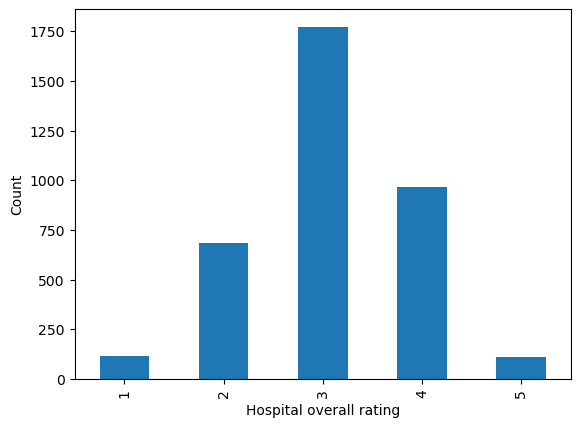

In [83]:
# EDA for Analysis


df_final.groupby('Hospital overall rating').size().plot(kind='bar')
plt.ylabel('Count')

In [84]:
corr = df_final.corr().abs()

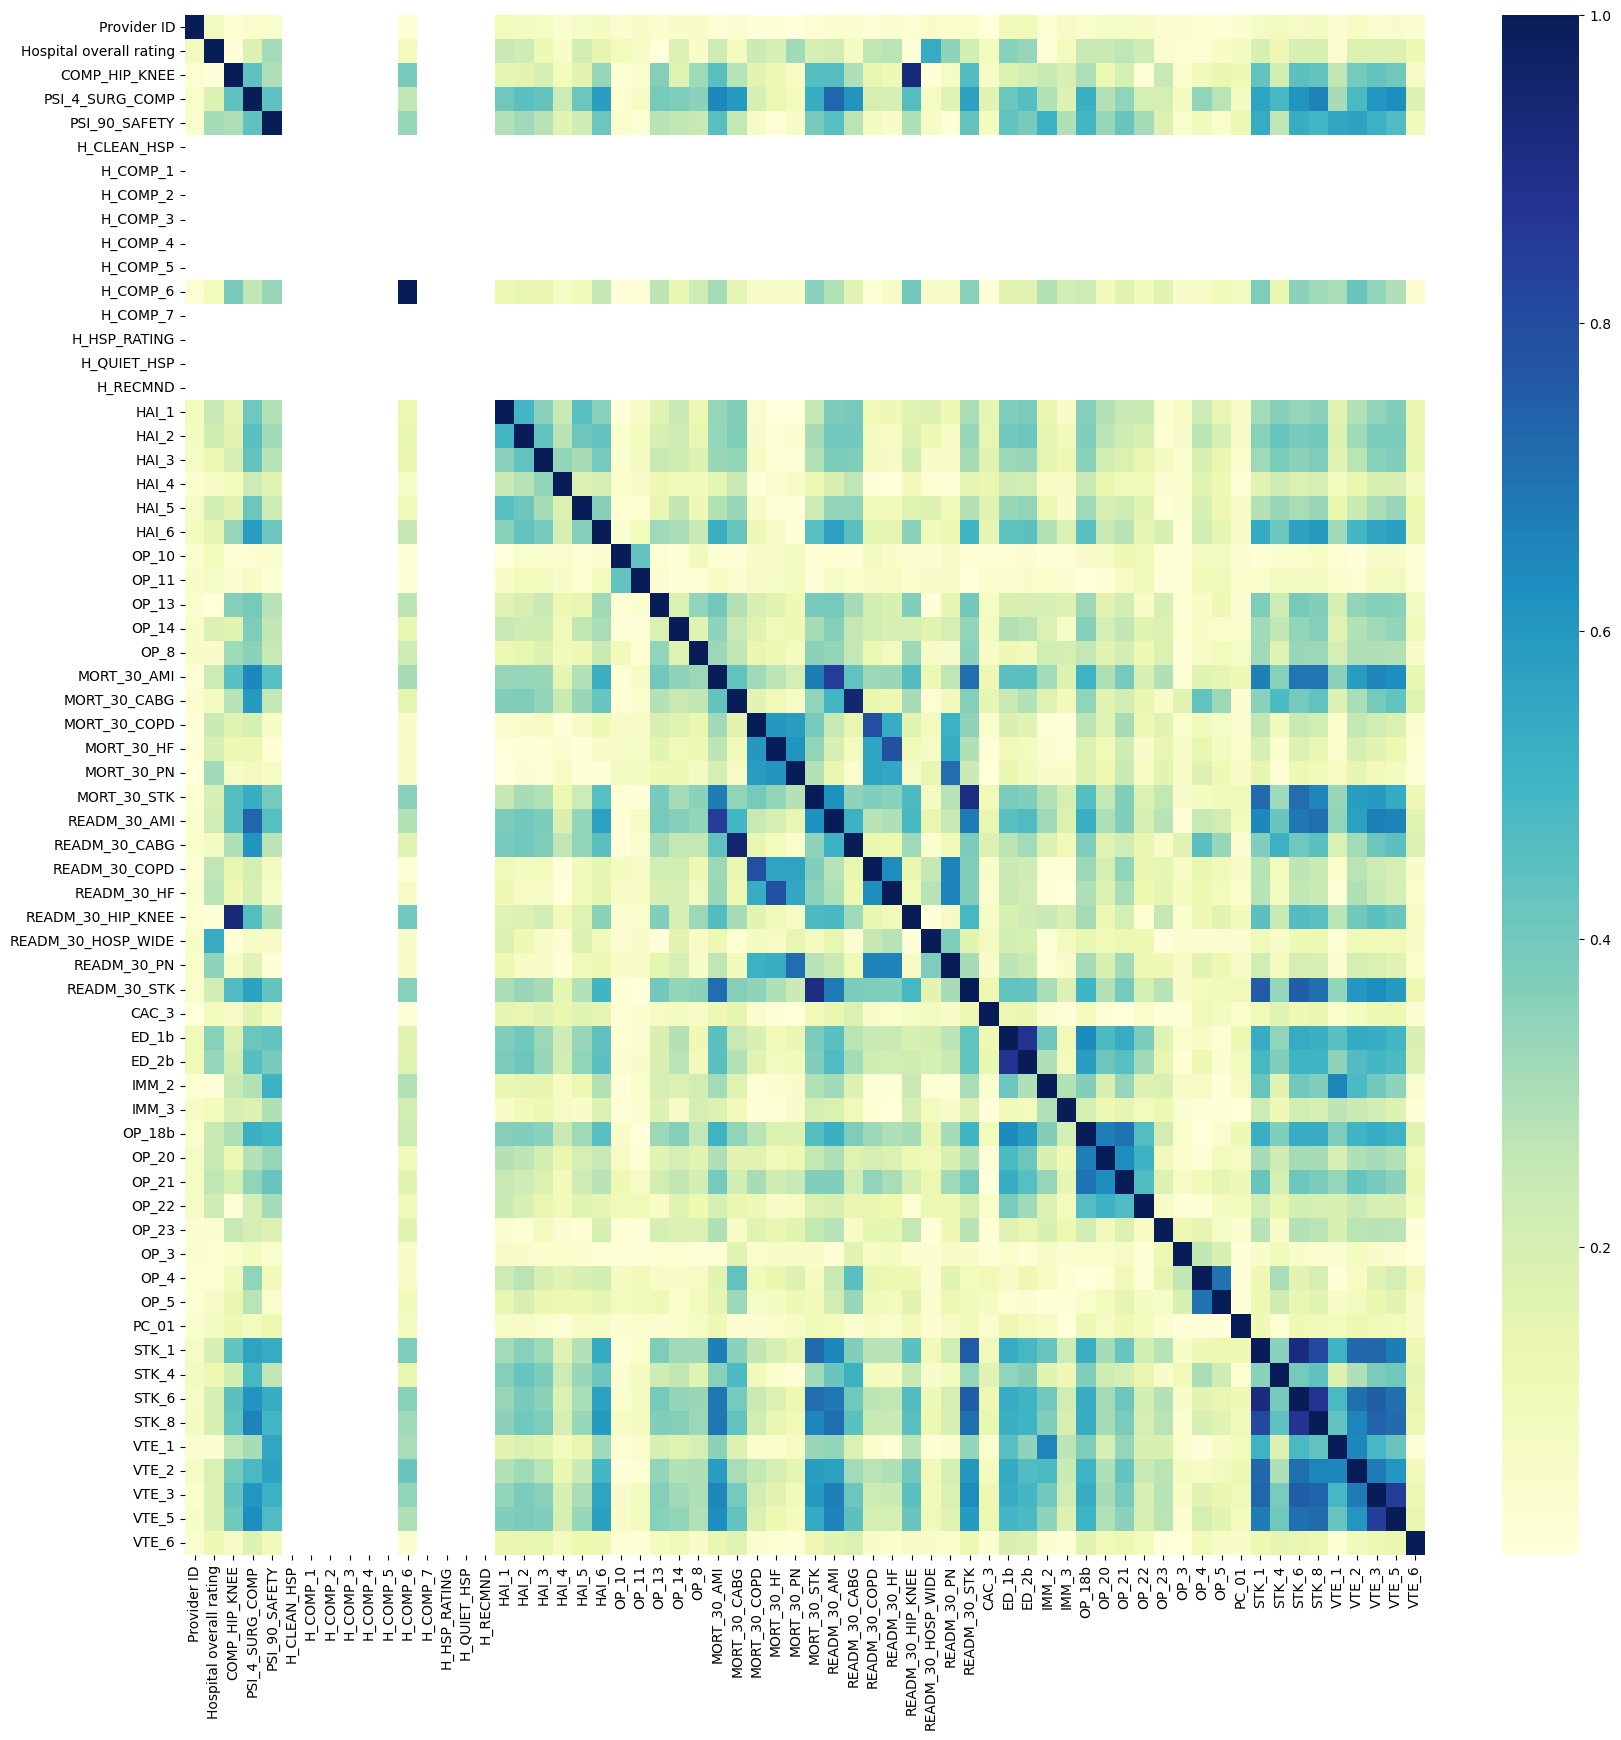

In [85]:
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [86]:
df_des = df_final.drop(['Provider ID','Hospital overall rating'], axis=1)

In [87]:
df_des.describe()

,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
count,3648.000000,3648.000000,3648.000000,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.000000,...,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,2.203755,68.123251,0.742955,0.0,0.0,0.0,0.0,0.0,0.0,80.342105,...,1.638706,69.995066,21.759320,66.625822,59.703947,85.407346,76.163377,62.357182,55.725329,0.685307
std,1.442945,69.616229,0.369000,0.0,0.0,0.0,0.0,0.0,0.0,23.104162,...,3.716725,43.484416,39.374436,44.336662,45.613631,28.476847,39.956786,44.394533,46.307927,2.969396
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.0,0.0,0.0,0.0,0.0,0.0,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,87.000000,0.000000,0.000000,0.000000
50%,2.700000,0.000000,0.840000,0.0,0.0,0.0,0.0,0.0,0.0,87.000000,...,0.000000,97.000000,0.000000,96.000000,91.000000,96.000000,98.000000,90.000000,85.000000,0.000000
75%,3.200000,135.487500,0.940000,0.0,0.0,0.0,0.0,0.0,0.0,89.000000,...,2.000000,100.000000,0.000000,99.000000,98.000000,99.000000,100.000000,98.000000,100.000000,0.000000
max,6.000000,212.160000,2.140000,0.0,0.0,0.0,0.0,0.0,0.0,99.000000,...,79.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,94.000000


In [88]:
df_out = df_final.drop(['Provider ID'], axis = 1)

In [89]:
df_out

,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
0,3,3.8,168.26,0.68,0,0,0,0,0,0,...,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0
1,3,3.0,179.05,0.85,0,0,0,0,0,0,...,1.0,98.0,0.0,88.0,100.0,95.0,94.0,100.0,100.0,0.0
2,2,3.8,198.33,0.91,0,0,0,0,0,0,...,0.0,99.0,0.0,97.0,90.0,98.0,89.0,86.0,92.0,0.0
3,3,0.0,0.00,0.79,0,0,0,0,0,0,...,0.0,80.0,0.0,71.0,0.0,97.0,99.0,0.0,0.0,0.0
4,3,0.0,0.00,0.90,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,3,0.0,0.00,0.80,0,0,0,0,0,0,...,0.0,75.0,0.0,91.0,81.0,67.0,71.0,100.0,0.0,0.0
4801,3,0.0,0.00,1.01,0,0,0,0,0,0,...,3.0,100.0,0.0,100.0,93.0,100.0,98.0,0.0,0.0,0.0
4812,2,2.9,0.00,0.00,0,0,0,0,0,0,...,11.0,96.0,0.0,88.0,100.0,80.0,83.0,92.0,87.0,0.0
4813,2,0.0,0.00,0.00,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,80.0,98.0,82.0,43.0,0.0


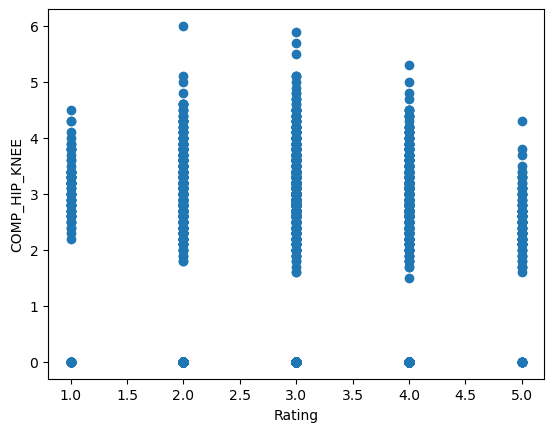

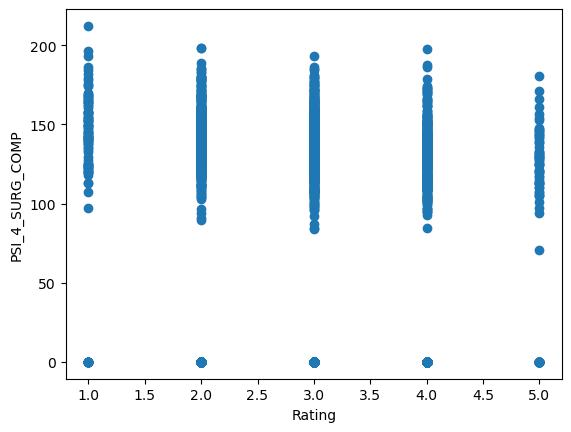

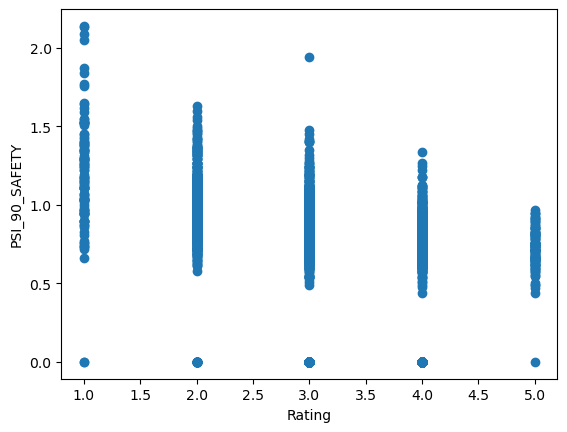

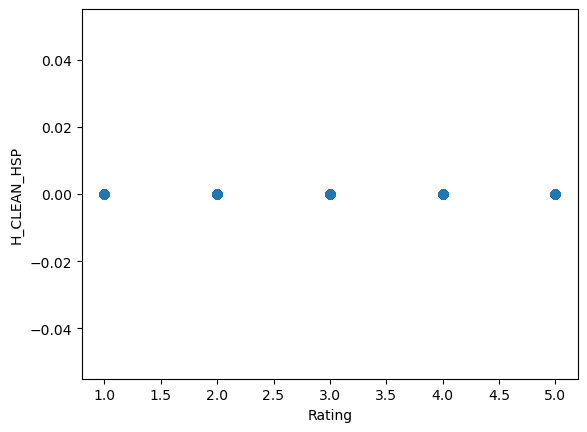

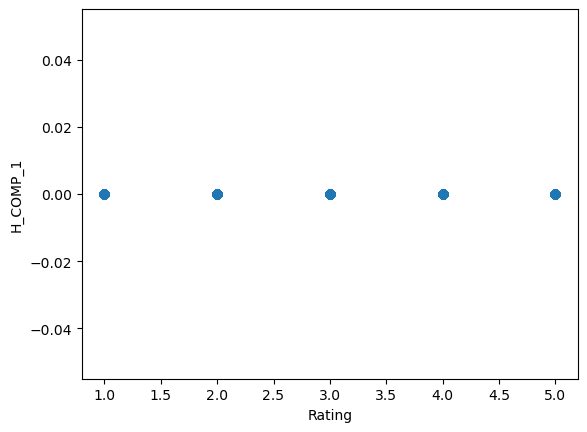

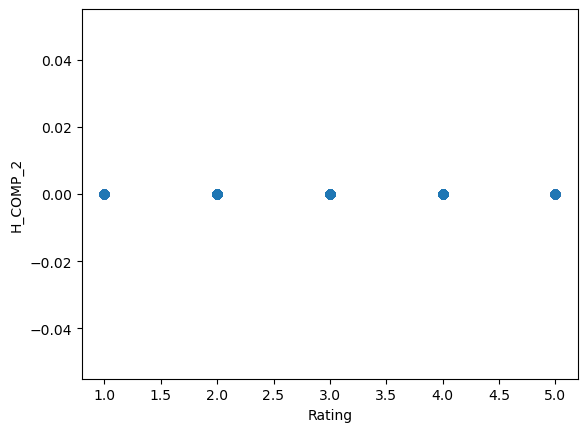

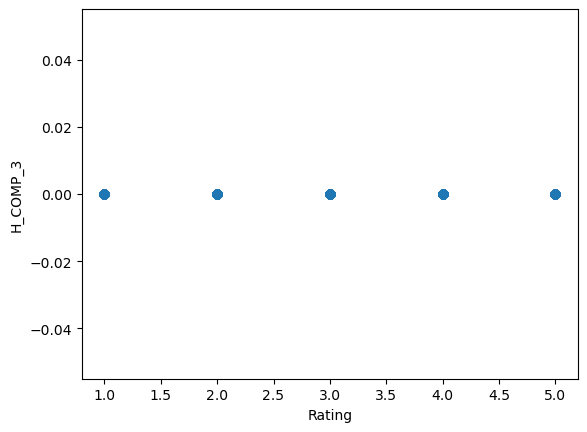

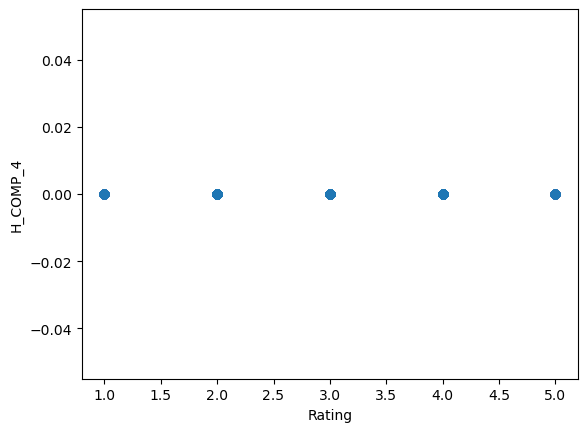

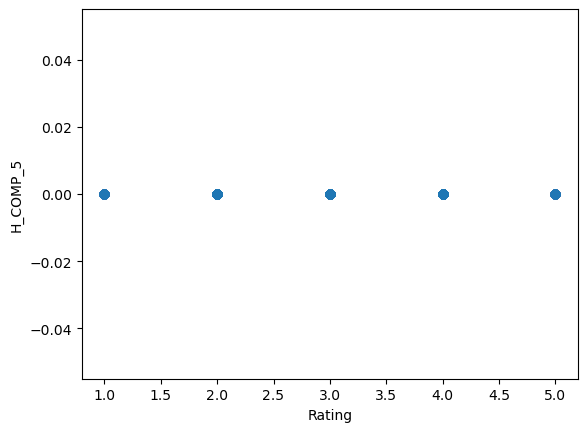

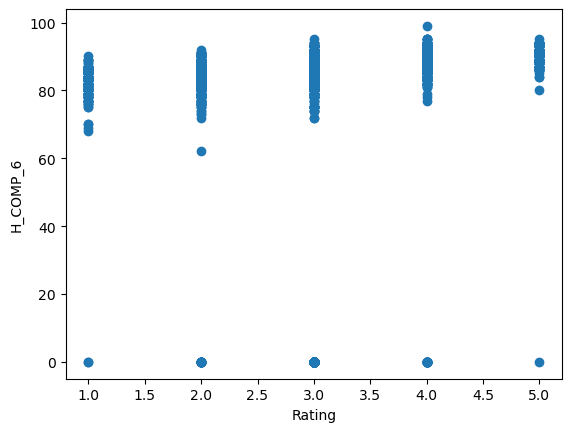

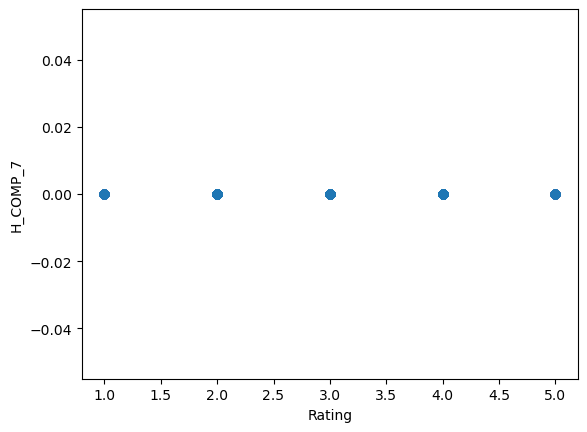

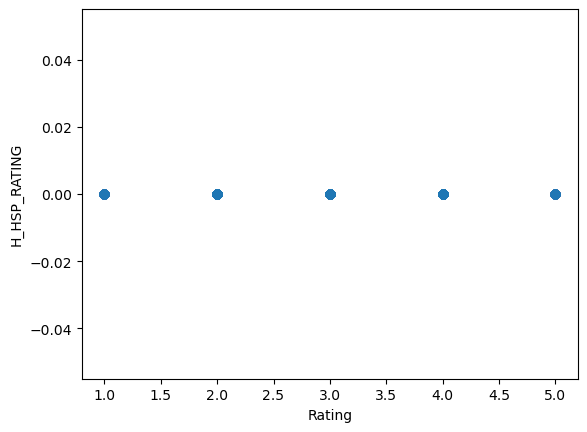

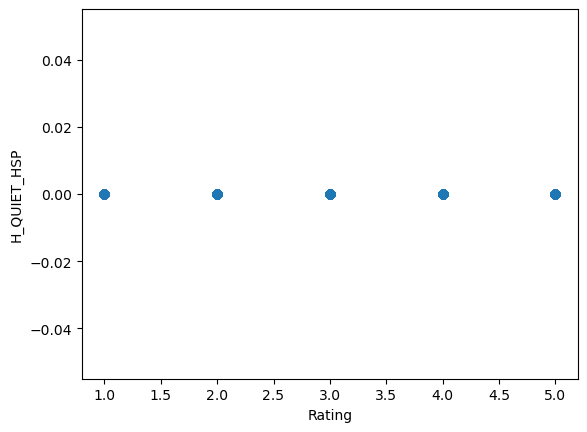

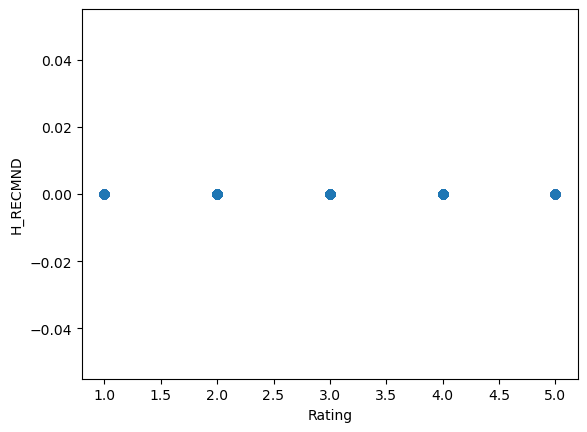

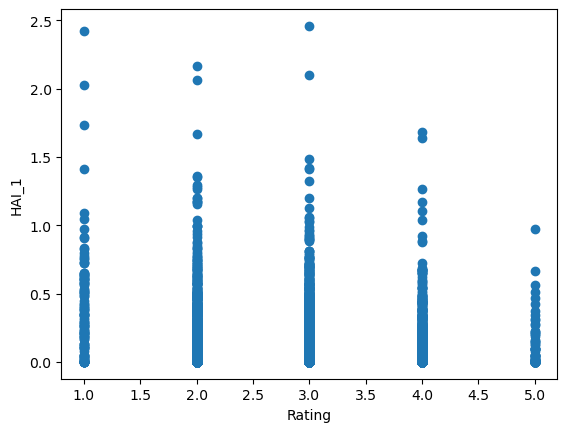

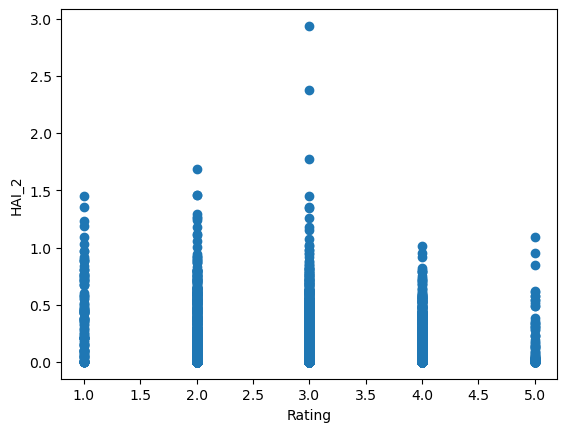

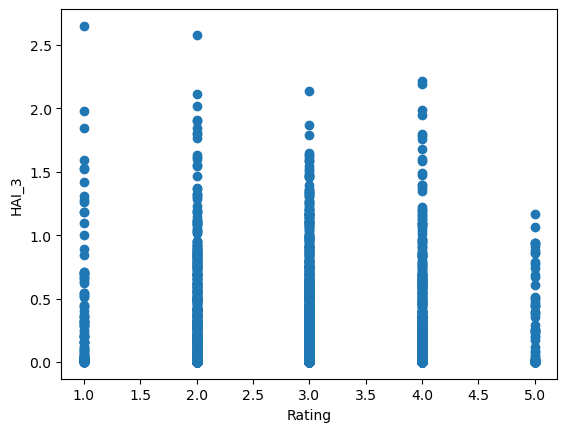

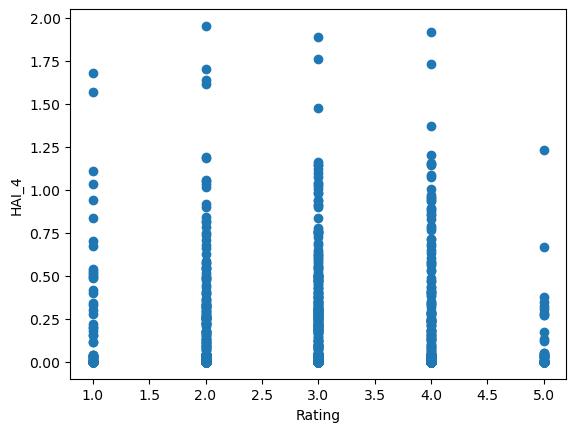

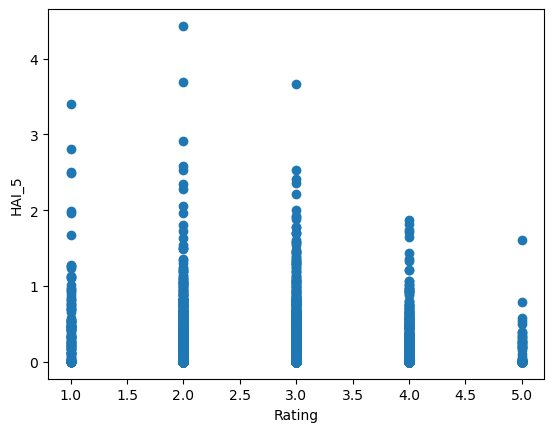

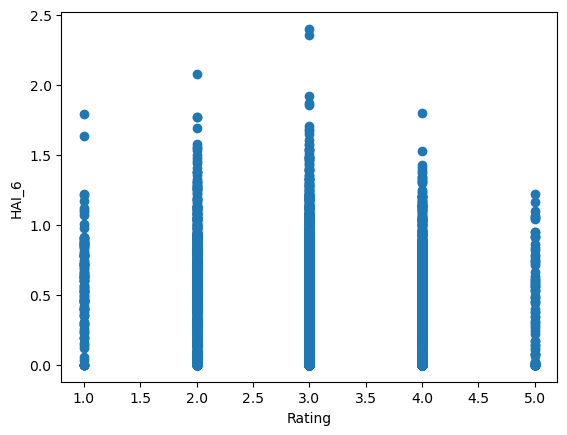

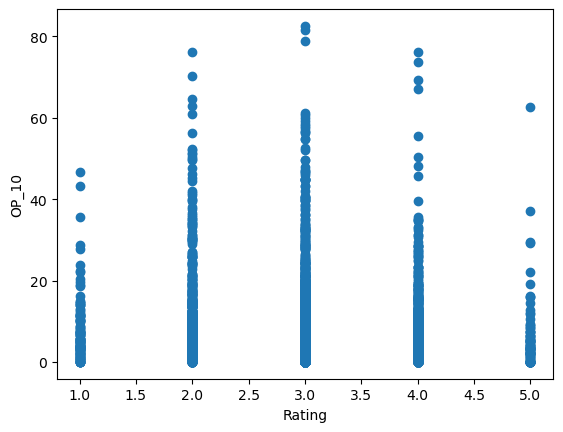

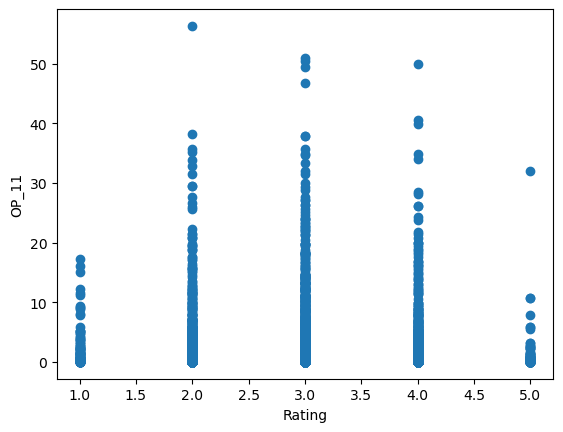

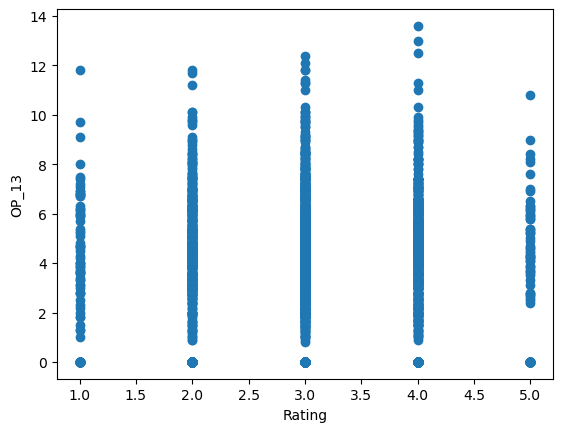

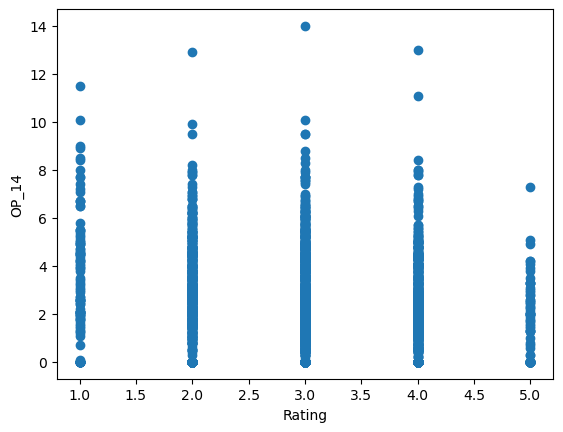

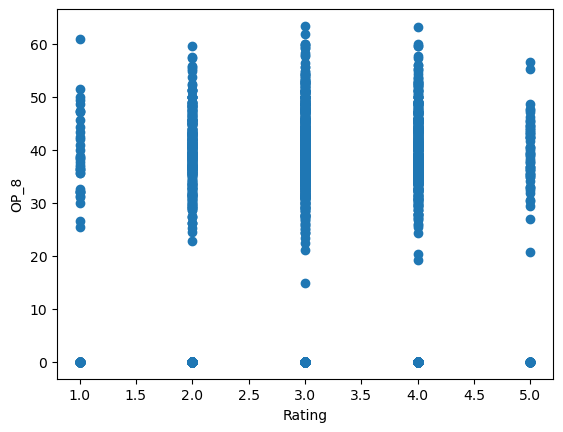

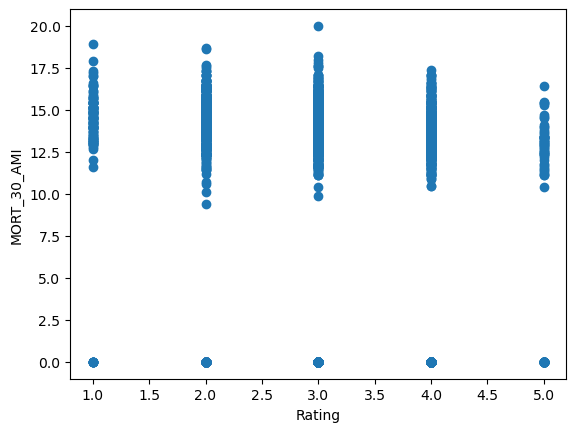

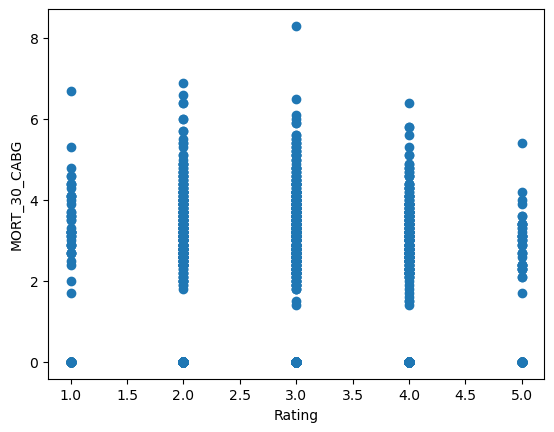

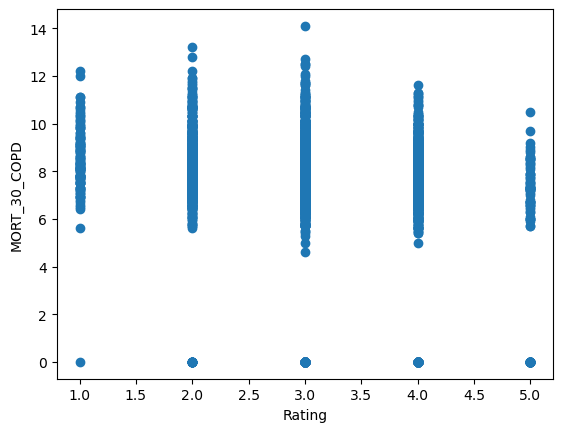

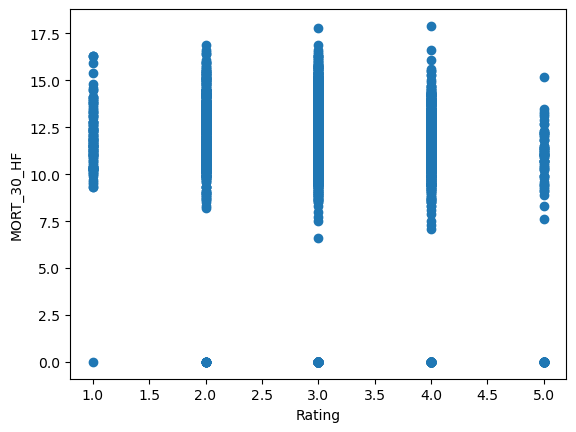

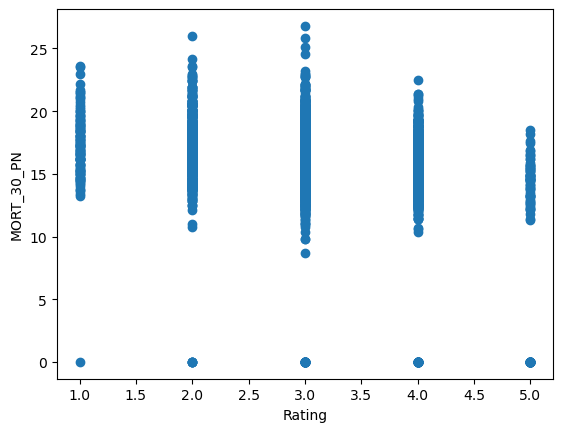

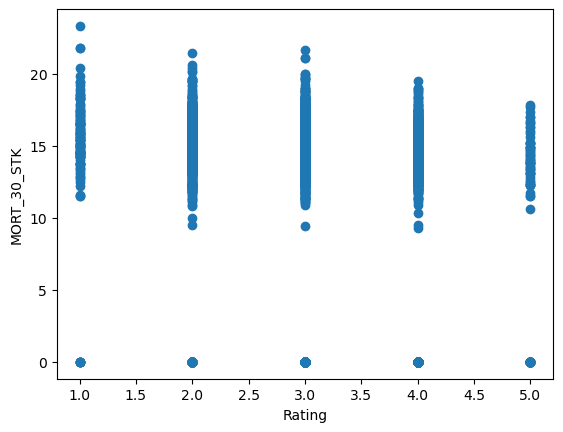

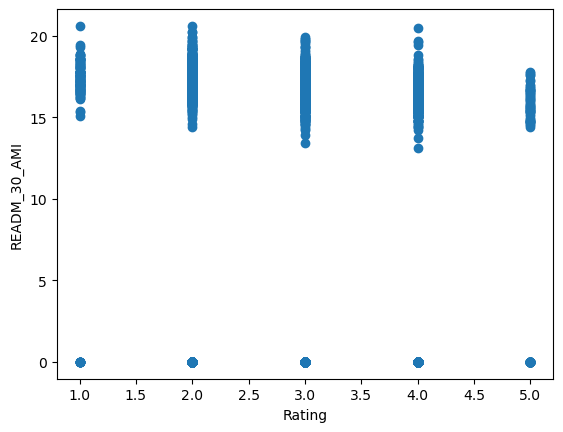

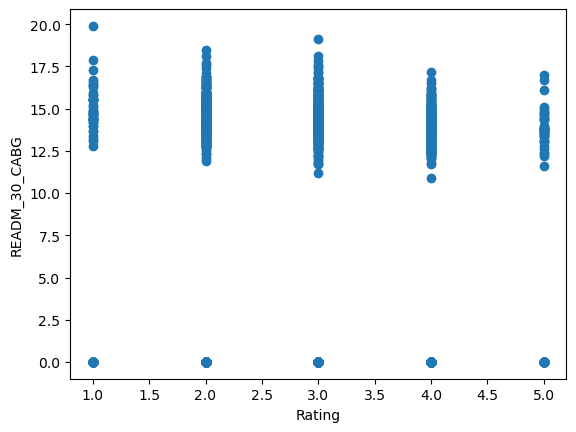

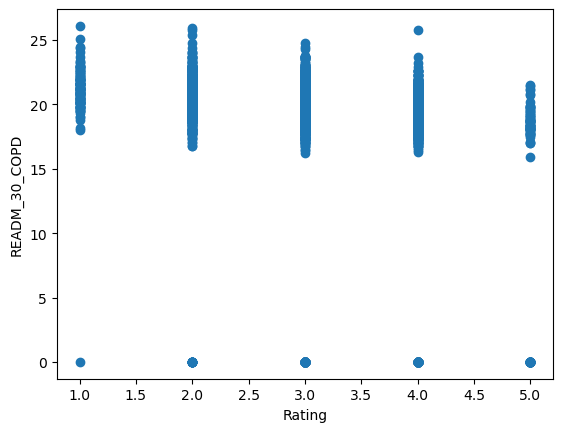

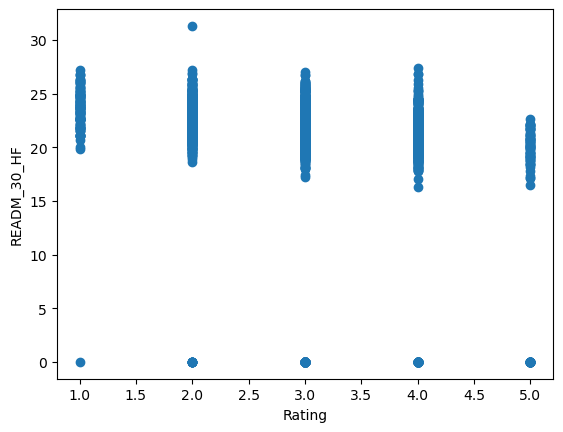

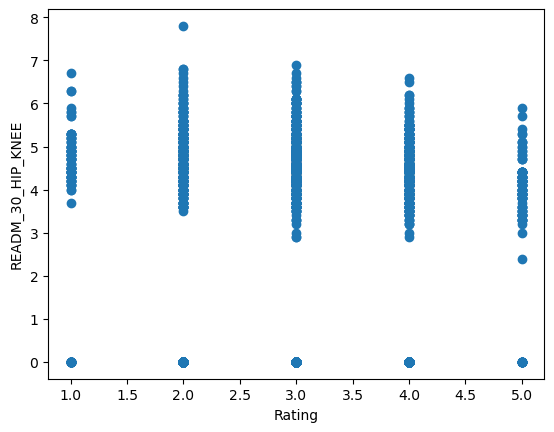

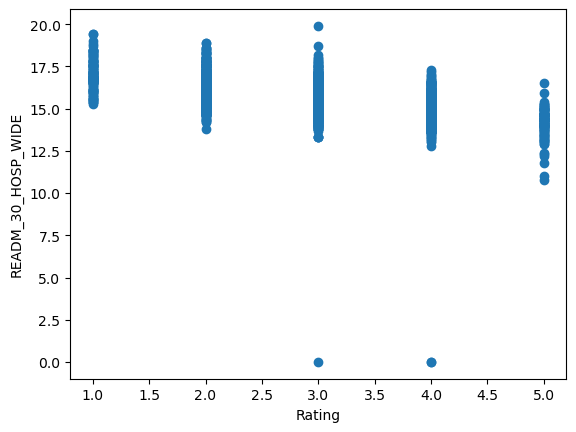

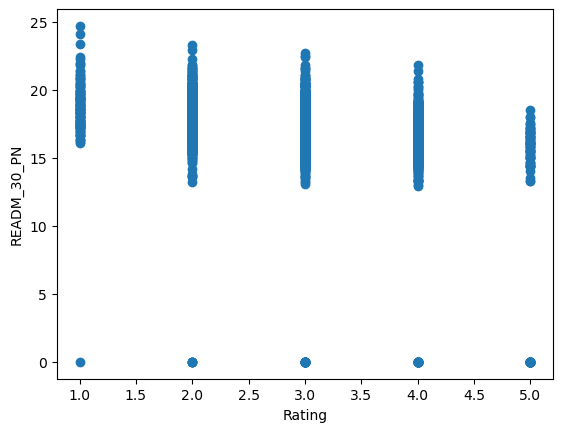

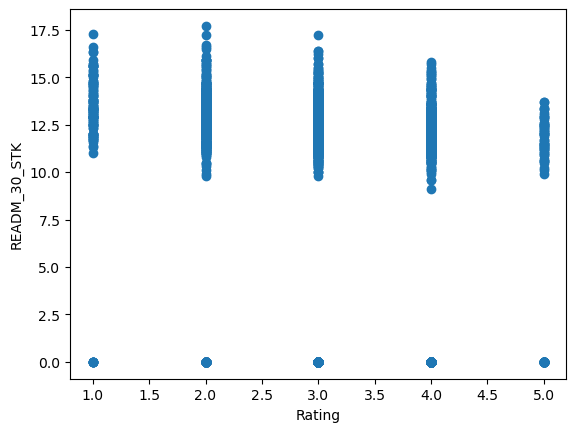

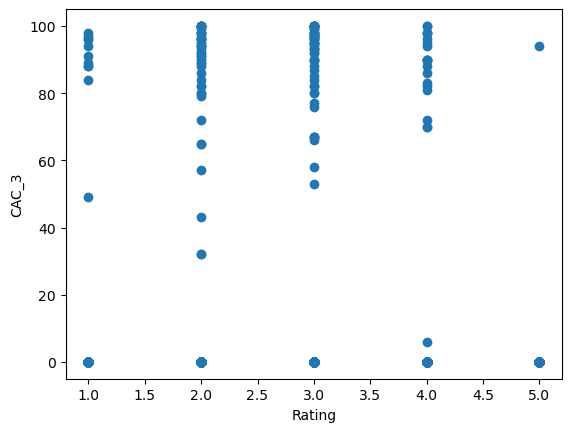

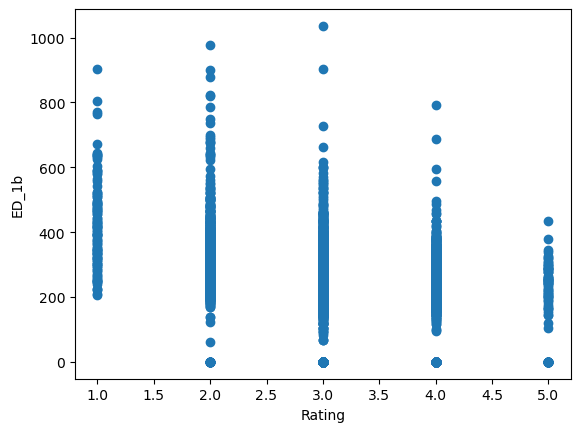

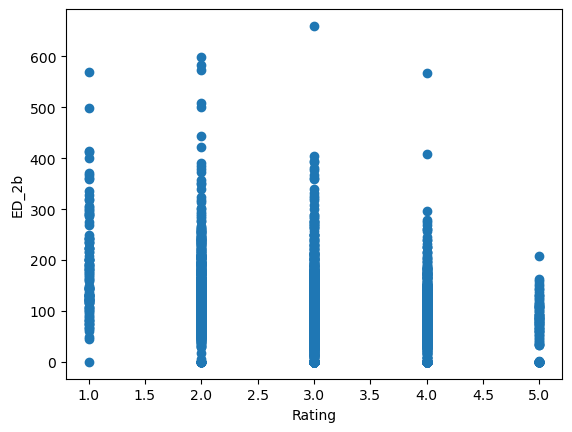

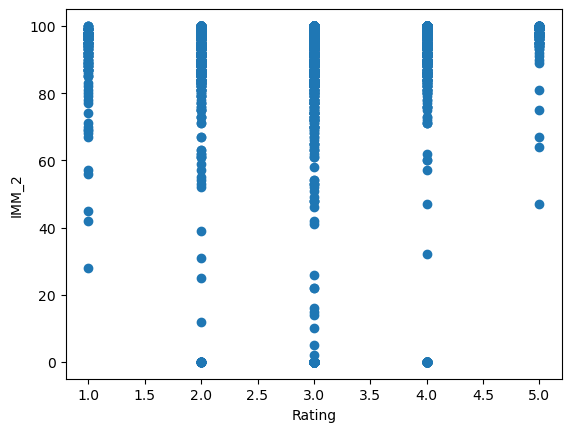

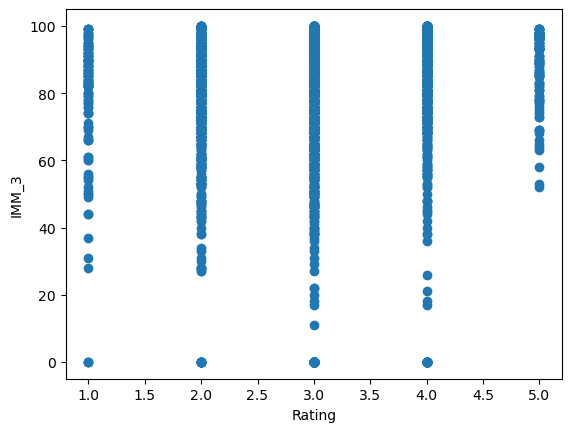

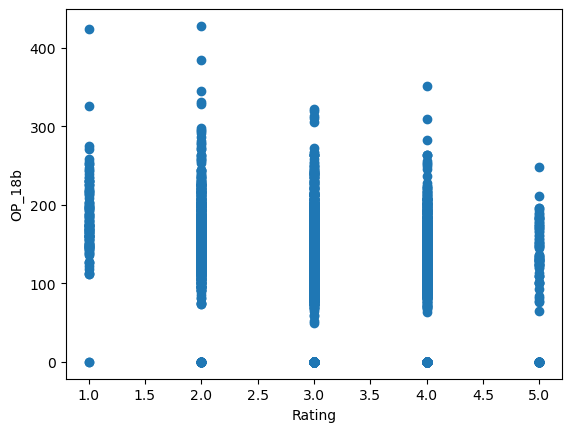

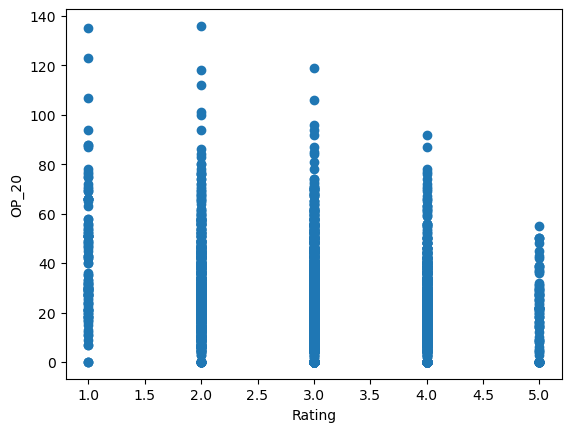

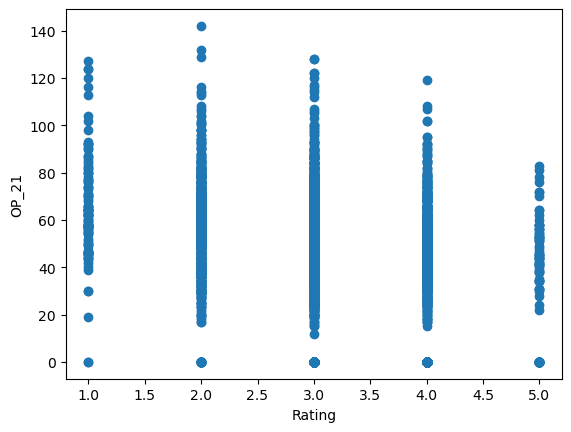

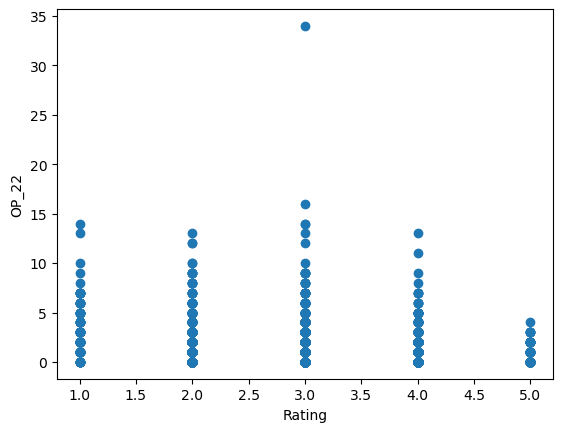

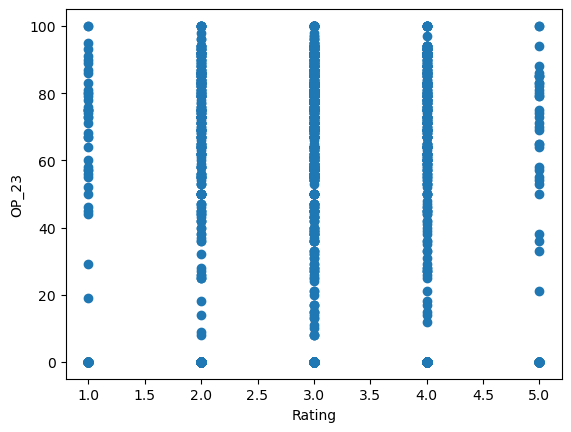

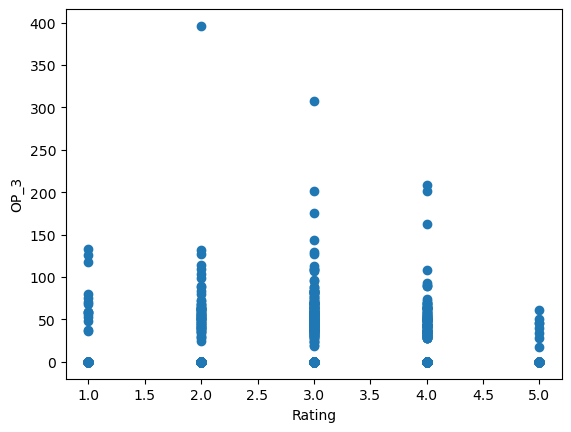

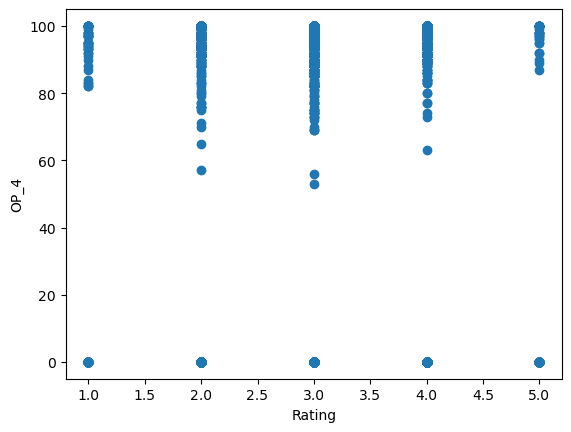

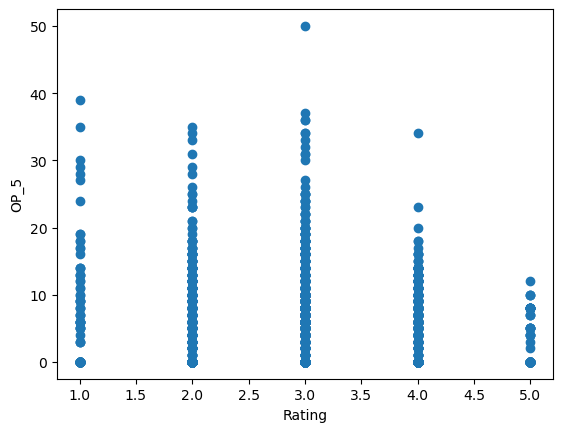

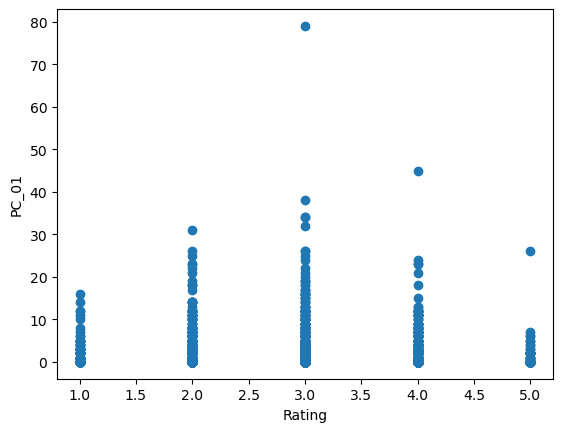

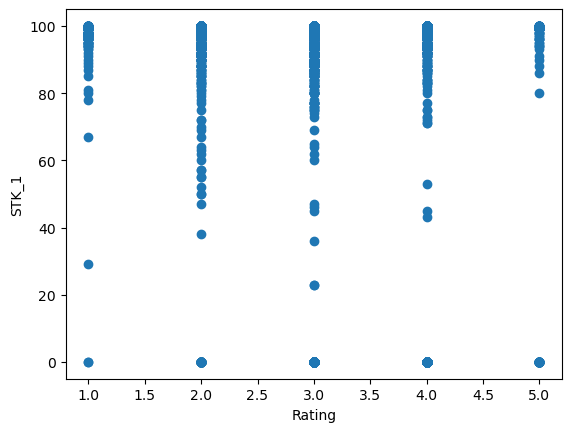

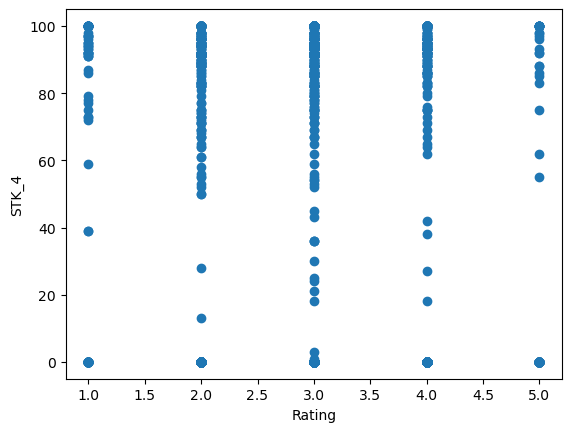

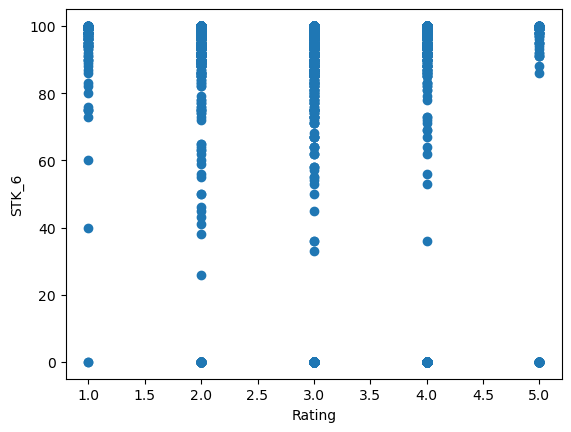

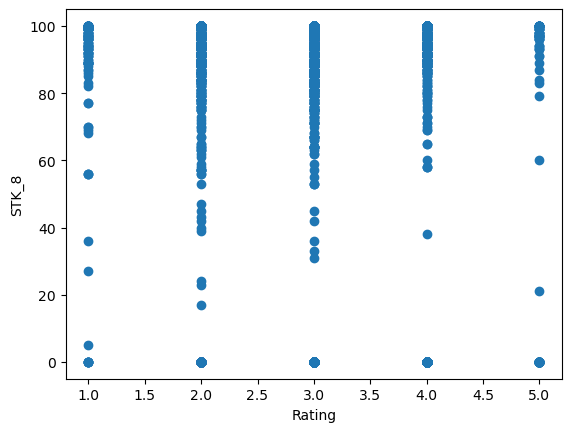

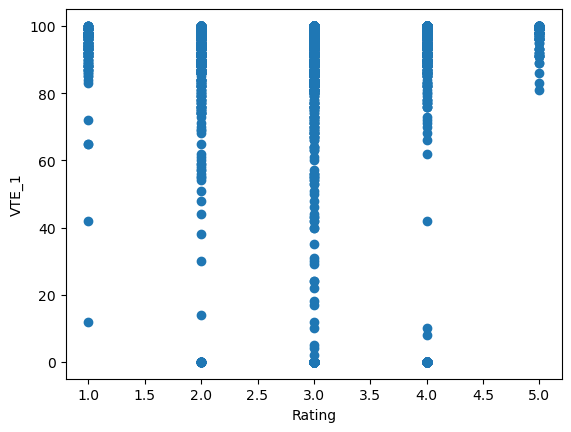

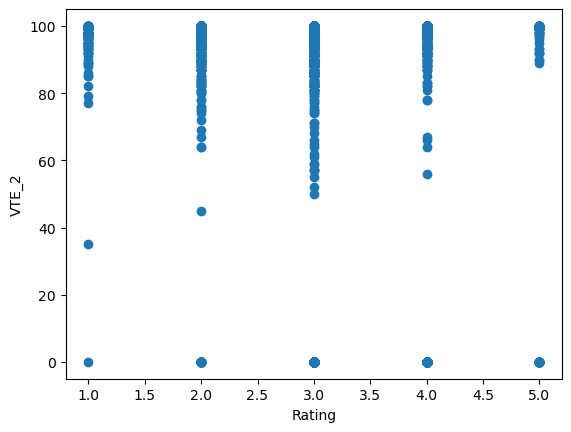

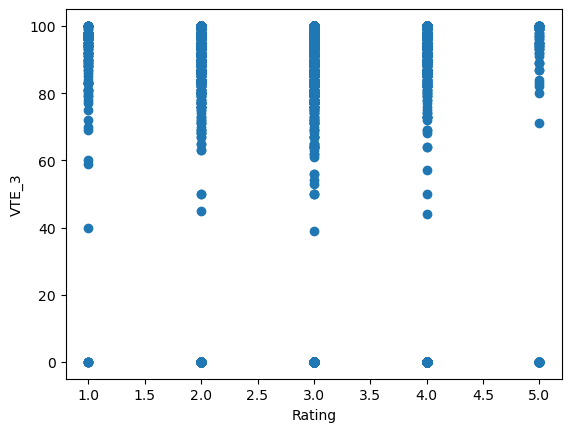

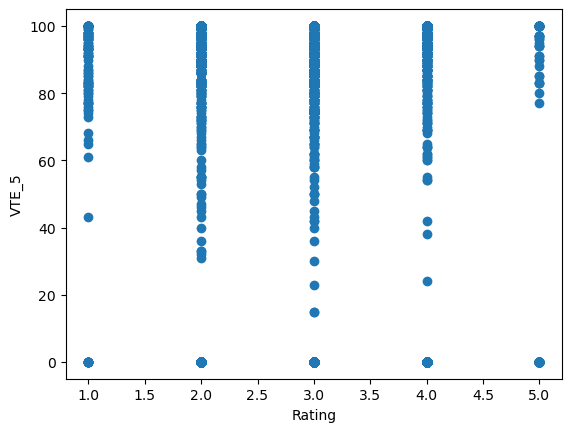

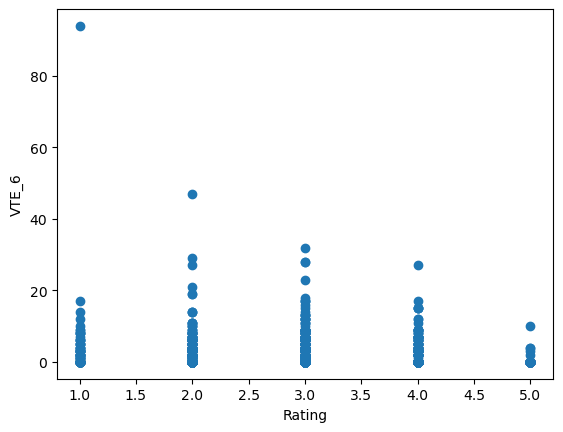

In [90]:
plt.figure()
for col in range(1, df_out.shape[1]):
    plt.scatter(df_out["Hospital overall rating"], df_out.iloc[:, col])
    plt.xlabel("Rating")
    plt.ylabel(df_out.columns[col])
    plt.show()

In [91]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provider ID              3648 non-null   int64  
 1   Hospital overall rating  3648 non-null   int32  
 2   COMP_HIP_KNEE            3648 non-null   float64
 3   PSI_4_SURG_COMP          3648 non-null   float64
 4   PSI_90_SAFETY            3648 non-null   float64
 5   H_CLEAN_HSP              3648 non-null   int64  
 6   H_COMP_1                 3648 non-null   int64  
 7   H_COMP_2                 3648 non-null   int64  
 8   H_COMP_3                 3648 non-null   int64  
 9   H_COMP_4                 3648 non-null   int64  
 10  H_COMP_5                 3648 non-null   int64  
 11  H_COMP_6                 3648 non-null   float64
 12  H_COMP_7                 3648 non-null   int64  
 13  H_HSP_RATING             3648 non-null   int64  
 14  H_QUIET_HSP              3648

In [92]:
# Splitting the data into training & testing 

from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X
X = df_final.drop(['Hospital overall rating'], axis=1)
X.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
0,10001,3.8,168.26,0.68,0,0,0,0,0,0,...,0.0,99.0,67.0,99.0,87.0,97.0,99.0,91.0,90.0,0.0
1,10005,3.0,179.05,0.85,0,0,0,0,0,0,...,1.0,98.0,0.0,88.0,100.0,95.0,94.0,100.0,100.0,0.0
2,10006,3.8,198.33,0.91,0,0,0,0,0,0,...,0.0,99.0,0.0,97.0,90.0,98.0,89.0,86.0,92.0,0.0
3,10007,0.0,0.00,0.79,0,0,0,0,0,0,...,0.0,80.0,0.0,71.0,0.0,97.0,99.0,0.0,0.0,0.0
4,10008,0.0,0.00,0.90,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0


In [94]:
# Putting response variable to y
y = df_final['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int32

In [95]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [96]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

In [97]:
df_final.columns

Index(['Provider ID', 'Hospital overall rating', 'COMP_HIP_KNEE',
       'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'H_CLEAN_HSP', 'H_COMP_1',
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',
       'HAI_4', 'HAI_5', 'HAI_6', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6'],
      dtype='object')

In [98]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_train[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_train.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
4110,450586,-1.535337,-0.980084,0.398726,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428750,-1.613401,-0.553492,-1.498509,-1.309272,0.161510,-1.880920,-1.397545,-1.207020,-0.256069
4025,450162,-0.281808,-0.980084,0.398726,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428750,-1.613401,-0.553492,-1.498509,-1.309272,0.511541,-1.880920,-1.397545,-1.207020,-0.256069
4464,500015,0.832440,0.993960,0.535015,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428750,0.596888,-0.553492,0.753290,0.839544,0.476538,0.602820,0.854085,0.954966,-0.256069
3983,450042,1.459205,0.983755,0.780337,0.0,0.0,0.0,0.0,0.0,0.0,...,1.642391,0.688984,1.535182,0.708254,0.861471,0.021498,0.428958,0.696471,0.890106,1.970071
119,30038,0.344956,1.144461,0.862110,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.428750,0.619912,1.866314,0.753290,0.620277,-0.328533,0.553145,0.471308,0.803627,1.228025


Linear Regression

In [99]:
# Model Building

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [100]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Provider ID', False, 29),
 ('COMP_HIP_KNEE', True, 1),
 ('PSI_4_SURG_COMP', True, 1),
 ('PSI_90_SAFETY', True, 1),
 ('H_CLEAN_HSP', False, 30),
 ('H_COMP_1', False, 31),
 ('H_COMP_2', False, 32),
 ('H_COMP_3', False, 36),
 ('H_COMP_4', False, 33),
 ('H_COMP_5', False, 37),
 ('H_COMP_6', True, 1),
 ('H_COMP_7', False, 34),
 ('H_HSP_RATING', False, 35),
 ('H_QUIET_HSP', False, 38),
 ('H_RECMND', False, 39),
 ('HAI_1', True, 1),
 ('HAI_2', False, 6),
 ('HAI_3', False, 15),
 ('HAI_4', False, 22),
 ('HAI_5', False, 10),
 ('HAI_6', False, 16),
 ('OP_10', True, 1),
 ('OP_11', False, 27),
 ('OP_13', True, 1),
 ('OP_14', False, 11),
 ('OP_8', True, 1),
 ('MORT_30_AMI', True, 1),
 ('MORT_30_CABG', True, 1),
 ('MORT_30_COPD', True, 1),
 ('MORT_30_HF', True, 1),
 ('MORT_30_PN', True, 1),
 ('MORT_30_STK', True, 1),
 ('READM_30_AMI', False, 13),
 ('READM_30_CABG', True, 1),
 ('READM_30_COPD', True, 1),
 ('READM_30_HF', True, 1),
 ('READM_30_HIP_KNEE', True, 1),
 ('READM_30_HOSP_WIDE', True, 1),
 

In [102]:
col = X_train.columns[rfe.support_]
col

Index(['COMP_HIP_KNEE', 'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'H_COMP_6',
       'HAI_1', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI', 'MORT_30_CABG',
       'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_STK', 'ED_1b', 'IMM_2', 'IMM_3',
       'STK_1', 'VTE_1'],
      dtype='object')

In [103]:
X_train.columns[~rfe.support_]

Index(['Provider ID', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_COMP_7', 'H_HSP_RATING', 'H_QUIET_HSP',
       'H_RECMND', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6', 'OP_11',
       'OP_14', 'READM_30_AMI', 'READM_30_PN', 'CAC_3', 'ED_2b', 'OP_18b',
       'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3', 'OP_4', 'OP_5', 'PC_01',
       'STK_4', 'STK_6', 'STK_8', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6'],
      dtype='object')

Model Building using statsmodel

In [104]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [105]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [106]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [107]:
lm.params

const                 3.090873
COMP_HIP_KNEE        -0.054287
PSI_4_SURG_COMP      -0.042234
PSI_90_SAFETY        -0.353505
H_COMP_6              0.103778
HAI_1                -0.067253
OP_10                -0.055120
OP_13                 0.050864
OP_8                  0.061677
MORT_30_AMI          -0.045727
MORT_30_CABG         -0.060559
MORT_30_COPD         -0.116079
MORT_30_HF           -0.069967
MORT_30_PN           -0.171754
MORT_30_STK          -0.085465
READM_30_CABG         0.118246
READM_30_COPD         0.128557
READM_30_HF           0.066834
READM_30_HIP_KNEE     0.082357
READM_30_HOSP_WIDE   -0.359676
READM_30_STK          0.061899
ED_1b                -0.174953
IMM_2                 0.118374
IMM_3                 0.067576
STK_1                 0.050913
VTE_1                 0.082226
dtype: float64

In [108]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.549
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     123.1
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:24   Log-Likelihood:                -2117.0
No. Observations:                     2553   AIC:                             4286.
Df Residuals:                         2527   BIC:                             4438.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.222      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0543      0.030     -1.822      0.069      -0.113       0.004
PSI_4_SURG_COMP       -0.0422      0.018     -2.393      0.017      -0.077      -0.008
PSI_90_SAFETY         -0.3535      0.015    -22.836      0.000      -0.384      -0.323
H_COMP_6               0.1038      0.013      8.005      0.000       0.078       0.129
HAI_1                 -0.0673      0.013     -5.122      0.000      -0.093      -0.042
OP_10                 -0.0551      0.011     -4.893      0.000      -0.077      -0.033
OP_13                  0.0509      0.013      3.897      0.000       0.025       0.076
OP_8                   0.0617      0.013      4.841      0.000       0.037       0.087
MORT_30_AMI           -0.0457      0.018     -2.492      0.013      -0.082      -0.010
MORT_30_CABG          -0.0606      0.037     -1.647      0.100      -0.133       0.012
MORT_30_COPD          -0.1161      0.021     -5.594      0.000      -0.157      -0.075
MORT_30_HF            -0.0700      0.021     -3.278      0.001      -0.112      -0.028
MORT_30_PN            -0.1718      0.015    -11.286      0.000      -0.202      -0.142
MORT_30_STK           -0.0855      0.029     -2.957      0.003      -0.142      -0.029
READM_30_CABG          0.1182      0.037      3.166      0.002       0.045       0.191
READM_30_COPD          0.1286      0.021      6.039      0.000       0.087       0.170
READM_30_HF            0.0668      0.022      3.098      0.002       0.025       0.109
READM_30_HIP_KNEE      0.0824      0.030      2.724      0.007       0.023       0.142
READM_30_HOSP_WIDE    -0.3597      0.013    -28.741      0.000      -0.384      -0.335
READM_30_STK           0.0619      0.031      1.985      0.047       0.001       0.123
ED_1b                 -0.1750      0.015    -11.549      0.000      -0.205      -0.145
IMM_2                  0.1184      0.016      7.504      0.000       0.087       0.149
IMM_3                  0.0676      0.012      5.674      0.000       0.044       0.091
STK_1                  0.0509      0.020      2.532      0.011       0.011       0.090
VTE_1                  0.0822      0.017      4.963      0.000       0.050       0.115
==============================================================================
Omnibus:                      898.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16239.085
Skew:                          -1.192   Prob(JB):                         0.00
Kurtosis:                      15.123   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors ass

In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,READM_30_CABG,11.47
10,MORT_30_CABG,11.11
20,READM_30_STK,7.99
18,READM_30_HIP_KNEE,7.52
1,COMP_HIP_KNEE,7.30
14,MORT_30_STK,6.87
17,READM_30_HF,3.83
12,MORT_30_HF,3.74
16,READM_30_COPD,3.72
11,MORT_30_COPD,3.54


Adj. R-square is 54.5% . 'READM_30_CABG' seems to have high VIF and 'MORT_30_CABG' has high p-values. But going with VIF values. So removing 'READM_30_CABG':

In [110]:
X_train_new = X_train_rfe.drop(["READM_30_CABG"], axis = 1)

In [111]:
# Adding a constant variable 
X_train_new_1 = sm.add_constant(X_train_new)

In [112]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_new_1).fit()   

In [113]:
lm_1.params

const                 3.090873
COMP_HIP_KNEE        -0.051094
PSI_4_SURG_COMP      -0.036720
PSI_90_SAFETY        -0.352826
H_COMP_6              0.103115
HAI_1                -0.065388
OP_10                -0.055770
OP_13                 0.053873
OP_8                  0.061769
MORT_30_AMI          -0.047818
MORT_30_CABG          0.046840
MORT_30_COPD         -0.118668
MORT_30_HF           -0.071233
MORT_30_PN           -0.174730
MORT_30_STK          -0.087655
READM_30_COPD         0.131982
READM_30_HF           0.067965
READM_30_HIP_KNEE     0.080979
READM_30_HOSP_WIDE   -0.359762
READM_30_STK          0.065824
ED_1b                -0.171959
IMM_2                 0.117350
IMM_3                 0.067213
STK_1                 0.050371
VTE_1                 0.081297
dtype: float64

In [114]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.543
Method:                      Least Squares   F-statistic:                     127.4
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:24   Log-Likelihood:                -2122.0
No. Observations:                     2553   AIC:                             4294.
Df Residuals:                         2528   BIC:                             4440.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.723      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0511      0.030     -1.713      0.087      -0.110       0.007
PSI_4_SURG_COMP       -0.0367      0.018     -2.087      0.037      -0.071      -0.002
PSI_90_SAFETY         -0.3528      0.016    -22.754      0.000      -0.383      -0.322
H_COMP_6               0.1031      0.013      7.941      0.000       0.078       0.129
HAI_1                 -0.0654      0.013     -4.976      0.000      -0.091      -0.040
OP_10                 -0.0558      0.011     -4.942      0.000      -0.078      -0.034
OP_13                  0.0539      0.013      4.131      0.000       0.028       0.079
OP_8                   0.0618      0.013      4.839      0.000       0.037       0.087
MORT_30_AMI           -0.0478      0.018     -2.603      0.009      -0.084      -0.012
MORT_30_CABG           0.0468      0.014      3.297      0.001       0.019       0.075
MORT_30_COPD          -0.1187      0.021     -5.713      0.000      -0.159      -0.078
MORT_30_HF            -0.0712      0.021     -3.332      0.001      -0.113      -0.029
MORT_30_PN            -0.1747      0.015    -11.483      0.000      -0.205      -0.145
MORT_30_STK           -0.0877      0.029     -3.028      0.002      -0.144      -0.031
READM_30_COPD          0.1320      0.021      6.197      0.000       0.090       0.174
READM_30_HF            0.0680      0.022      3.145      0.002       0.026       0.110
READM_30_HIP_KNEE      0.0810      0.030      2.673      0.008       0.022       0.140
READM_30_HOSP_WIDE    -0.3598      0.013    -28.696      0.000      -0.384      -0.335
READM_30_STK           0.0658      0.031      2.109      0.035       0.005       0.127
ED_1b                 -0.1720      0.015    -11.353      0.000      -0.202      -0.142
IMM_2                  0.1173      0.016      7.427      0.000       0.086       0.148
IMM_3                  0.0672      0.012      5.634      0.000       0.044       0.091
STK_1                  0.0504      0.020      2.501      0.012       0.011       0.090
VTE_1                  0.0813      0.017      4.899      0.000       0.049       0.114
==============================================================================
Omnibus:                      894.801   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16075.867
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                      15.062   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,READM_30_STK,7.98
17,READM_30_HIP_KNEE,7.51
1,COMP_HIP_KNEE,7.29
14,MORT_30_STK,6.86
16,READM_30_HF,3.83
12,MORT_30_HF,3.74
15,READM_30_COPD,3.71
11,MORT_30_COPD,3.53
23,STK_1,3.32
9,MORT_30_AMI,2.77


Adj. R-square is 54.3% (not much change). 'READM_30_STK' seems to have high VIF. But going with VIF values. So removing 'READM_30_STK':

In [116]:
X_train_new_1 = X_train_new_1.drop(["READM_30_STK"], axis = 1)

In [117]:
# Adding a constant variable  
X_train_new_1 = sm.add_constant(X_train_new_1)

In [118]:
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_new_1).fit()   

In [119]:
lm_2.params

const                 3.090873
COMP_HIP_KNEE        -0.053921
PSI_4_SURG_COMP      -0.034518
PSI_90_SAFETY        -0.351996
H_COMP_6              0.103716
HAI_1                -0.065201
OP_10                -0.054978
OP_13                 0.055038
OP_8                  0.063145
MORT_30_AMI          -0.042423
MORT_30_CABG          0.046545
MORT_30_COPD         -0.120512
MORT_30_HF           -0.075665
MORT_30_PN           -0.177104
MORT_30_STK          -0.040985
READM_30_COPD         0.135139
READM_30_HF           0.072969
READM_30_HIP_KNEE     0.085373
READM_30_HOSP_WIDE   -0.356720
ED_1b                -0.170244
IMM_2                 0.117837
IMM_3                 0.065858
STK_1                 0.059389
VTE_1                 0.078175
dtype: float64

In [120]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.547
Model:                                 OLS   Adj. R-squared:                  0.542
Method:                      Least Squares   F-statistic:                     132.5
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:25   Log-Likelihood:                -2124.3
No. Observations:                     2553   AIC:                             4297.
Df Residuals:                         2529   BIC:                             4437.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.533      0.000       3.069       3.113
COMP_HIP_KNEE         -0.0539      0.030     -1.808      0.071      -0.112       0.005
PSI_4_SURG_COMP       -0.0345      0.018     -1.964      0.050      -0.069   -5.81e-05
PSI_90_SAFETY         -0.3520      0.016    -22.693      0.000      -0.382      -0.322
H_COMP_6               0.1037      0.013      7.984      0.000       0.078       0.129
HAI_1                 -0.0652      0.013     -4.959      0.000      -0.091      -0.039
OP_10                 -0.0550      0.011     -4.872      0.000      -0.077      -0.033
OP_13                  0.0550      0.013      4.221      0.000       0.029       0.081
OP_8                   0.0631      0.013      4.950      0.000       0.038       0.088
MORT_30_AMI           -0.0424      0.018     -2.330      0.020      -0.078      -0.007
MORT_30_CABG           0.0465      0.014      3.274      0.001       0.019       0.074
MORT_30_COPD          -0.1205      0.021     -5.803      0.000      -0.161      -0.080
MORT_30_HF            -0.0757      0.021     -3.554      0.000      -0.117      -0.034
MORT_30_PN            -0.1771      0.015    -11.663      0.000      -0.207      -0.147
MORT_30_STK           -0.0410      0.019     -2.194      0.028      -0.078      -0.004
READM_30_COPD          0.1351      0.021      6.357      0.000       0.093       0.177
READM_30_HF            0.0730      0.021      3.395      0.001       0.031       0.115
READM_30_HIP_KNEE      0.0854      0.030      2.823      0.005       0.026       0.145
READM_30_HOSP_WIDE    -0.3567      0.012    -28.624      0.000      -0.381      -0.332
ED_1b                 -0.1702      0.015    -11.248      0.000      -0.200      -0.141
IMM_2                  0.1178      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0659      0.012      5.525      0.000       0.042       0.089
STK_1                  0.0594      0.020      3.015      0.003       0.021       0.098
VTE_1                  0.0782      0.017      4.726      0.000       0.046       0.111
==============================================================================
Omnibus:                      871.518   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14914.458
Skew:                          -1.158   Prob(JB):                         0.00
Kurtosis:                      14.612   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,READM_30_HIP_KNEE,7.48
1,COMP_HIP_KNEE,7.27
16,READM_30_HF,3.78
12,MORT_30_HF,3.71
15,READM_30_COPD,3.70
11,MORT_30_COPD,3.53
22,STK_1,3.17
14,MORT_30_STK,2.85
9,MORT_30_AMI,2.71
2,PSI_4_SURG_COMP,2.53


Adj. R-square is 54.2% (not much change). 'READM_30_HIP_KNEE' seems to have high VIF.But going with VIF values. So removing 'READM_30_HIP_KNEE':

In [122]:
X_train_new_2 = X_train_new_1.drop(["READM_30_HIP_KNEE"], axis = 1)

In [123]:
# Adding a constant variable  
X_train_new_2 = sm.add_constant(X_train_new_2)

In [124]:
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_new_2).fit()   

In [125]:
lm_3.params

const                 3.090873
COMP_HIP_KNEE         0.020840
PSI_4_SURG_COMP      -0.031523
PSI_90_SAFETY        -0.353499
H_COMP_6              0.106223
HAI_1                -0.065049
OP_10                -0.055475
OP_13                 0.055986
OP_8                  0.063268
MORT_30_AMI          -0.040210
MORT_30_CABG          0.048489
MORT_30_COPD         -0.119617
MORT_30_HF           -0.077006
MORT_30_PN           -0.177113
MORT_30_STK          -0.038440
READM_30_COPD         0.132486
READM_30_HF           0.072927
READM_30_HOSP_WIDE   -0.354123
ED_1b                -0.171624
IMM_2                 0.118000
IMM_3                 0.065632
STK_1                 0.058248
VTE_1                 0.080020
dtype: float64

In [126]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     137.8
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:25   Log-Likelihood:                -2128.3
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2530   BIC:                             4437.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.148      0.000       3.069       3.113
COMP_HIP_KNEE          0.0208      0.014      1.517      0.129      -0.006       0.048
PSI_4_SURG_COMP       -0.0315      0.018     -1.795      0.073      -0.066       0.003
PSI_90_SAFETY         -0.3535      0.016    -22.771      0.000      -0.384      -0.323
H_COMP_6               0.1062      0.013      8.184      0.000       0.081       0.132
HAI_1                 -0.0650      0.013     -4.941      0.000      -0.091      -0.039
OP_10                 -0.0555      0.011     -4.910      0.000      -0.078      -0.033
OP_13                  0.0560      0.013      4.289      0.000       0.030       0.082
OP_8                   0.0633      0.013      4.953      0.000       0.038       0.088
MORT_30_AMI           -0.0402      0.018     -2.207      0.027      -0.076      -0.004
MORT_30_CABG           0.0485      0.014      3.410      0.001       0.021       0.076
MORT_30_COPD          -0.1196      0.021     -5.753      0.000      -0.160      -0.079
MORT_30_HF            -0.0770      0.021     -3.613      0.000      -0.119      -0.035
MORT_30_PN            -0.1771      0.015    -11.648      0.000      -0.207      -0.147
MORT_30_STK           -0.0384      0.019     -2.058      0.040      -0.075      -0.002
READM_30_COPD          0.1325      0.021      6.230      0.000       0.091       0.174
READM_30_HF            0.0729      0.022      3.388      0.001       0.031       0.115
READM_30_HOSP_WIDE    -0.3541      0.012    -28.455      0.000      -0.379      -0.330
ED_1b                 -0.1716      0.015    -11.330      0.000      -0.201      -0.142
IMM_2                  0.1180      0.016      7.454      0.000       0.087       0.149
IMM_3                  0.0656      0.012      5.498      0.000       0.042       0.089
STK_1                  0.0582      0.020      2.954      0.003       0.020       0.097
VTE_1                  0.0800      0.017      4.835      0.000       0.048       0.112
==============================================================================
Omnibus:                      859.290   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14421.786
Skew:                          -1.141   Prob(JB):                         0.00
Kurtosis:                      14.418   Cond. No.                         7.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,READM_30_HF,3.78
12,MORT_30_HF,3.70
15,READM_30_COPD,3.69
11,MORT_30_COPD,3.53
21,STK_1,3.17
14,MORT_30_STK,2.85
9,MORT_30_AMI,2.71
2,PSI_4_SURG_COMP,2.52
22,VTE_1,2.23
19,IMM_2,2.04


Adj. R-square is 54.1% (not much change). VIF seems good but 'COMP_HIP_KNEE' has high p-values. So removing 'COMP_HIP_KNEE':

In [128]:
X_train_new_3 = X_train_new_2.drop(["COMP_HIP_KNEE"], axis = 1)

In [129]:
# Adding a constant variable  
X_train_new_3 = sm.add_constant(X_train_new_3)

In [130]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_new_3).fit()

In [131]:
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_new_3).fit()

In [132]:
lm_4.params

const                 3.090873
PSI_4_SURG_COMP      -0.027615
PSI_90_SAFETY        -0.354035
H_COMP_6              0.110474
HAI_1                -0.065633
OP_10                -0.055922
OP_13                 0.058296
OP_8                  0.065062
MORT_30_AMI          -0.037866
MORT_30_CABG          0.048619
MORT_30_COPD         -0.119006
MORT_30_HF           -0.076990
MORT_30_PN           -0.176943
MORT_30_STK          -0.035765
READM_30_COPD         0.131981
READM_30_HF           0.071957
READM_30_HOSP_WIDE   -0.353801
ED_1b                -0.173452
IMM_2                 0.117605
IMM_3                 0.066345
STK_1                 0.059483
VTE_1                 0.081031
dtype: float64

In [133]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.545
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     144.2
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:25   Log-Likelihood:                -2129.4
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2531   BIC:                             4431.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    279.077      0.000       3.069       3.113
PSI_4_SURG_COMP       -0.0276      0.017     -1.589      0.112      -0.062       0.006
PSI_90_SAFETY         -0.3540      0.016    -22.806      0.000      -0.384      -0.324
H_COMP_6               0.1105      0.013      8.716      0.000       0.086       0.135
HAI_1                 -0.0656      0.013     -4.986      0.000      -0.091      -0.040
OP_10                 -0.0559      0.011     -4.949      0.000      -0.078      -0.034
OP_13                  0.0583      0.013      4.496      0.000       0.033       0.084
OP_8                   0.0651      0.013      5.114      0.000       0.040       0.090
MORT_30_AMI           -0.0379      0.018     -2.086      0.037      -0.073      -0.002
MORT_30_CABG           0.0486      0.014      3.418      0.001       0.021       0.077
MORT_30_COPD          -0.1190      0.021     -5.723      0.000      -0.160      -0.078
MORT_30_HF            -0.0770      0.021     -3.612      0.000      -0.119      -0.035
MORT_30_PN            -0.1769      0.015    -11.634      0.000      -0.207      -0.147
MORT_30_STK           -0.0358      0.019     -1.922      0.055      -0.072       0.001
READM_30_COPD          0.1320      0.021      6.205      0.000       0.090       0.174
READM_30_HF            0.0720      0.022      3.344      0.001       0.030       0.114
READM_30_HOSP_WIDE    -0.3538      0.012    -28.426      0.000      -0.378      -0.329
ED_1b                 -0.1735      0.015    -11.484      0.000      -0.203      -0.144
IMM_2                  0.1176      0.016      7.428      0.000       0.087       0.149
IMM_3                  0.0663      0.012      5.561      0.000       0.043       0.090
STK_1                  0.0595      0.020      3.018      0.003       0.021       0.098
VTE_1                  0.0810      0.017      4.899      0.000       0.049       0.113
==============================================================================
Omnibus:                      869.622   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14745.264
Skew:                          -1.157   Prob(JB):                         0.00
Kurtosis:                      14.544   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,READM_30_HF,3.78
11,MORT_30_HF,3.70
14,READM_30_COPD,3.69
10,MORT_30_COPD,3.52
20,STK_1,3.17
13,MORT_30_STK,2.82
8,MORT_30_AMI,2.69
1,PSI_4_SURG_COMP,2.46
21,VTE_1,2.23
18,IMM_2,2.04


Adj. R-square is 54.1% (same). VIF seems good but 'PSI_4_SURG_COMP' has high p-values. So removing 'PSI_4_SURG_COMP':

In [135]:
X_train_new_4 = X_train_new_3.drop(["PSI_4_SURG_COMP"], axis = 1)

In [136]:
# Adding a constant variable  
X_train_new_4 = sm.add_constant(X_train_new_4)

In [137]:
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_new_4).fit()

In [138]:
lm_5.params

const                 3.090873
PSI_90_SAFETY        -0.356144
H_COMP_6              0.110855
HAI_1                -0.068344
OP_10                -0.054874
OP_13                 0.056248
OP_8                  0.063187
MORT_30_AMI          -0.045824
MORT_30_CABG          0.039842
MORT_30_COPD         -0.118452
MORT_30_HF           -0.075948
MORT_30_PN           -0.176057
MORT_30_STK          -0.037499
READM_30_COPD         0.131265
READM_30_HF           0.071663
READM_30_HOSP_WIDE   -0.353386
ED_1b                -0.175260
IMM_2                 0.117721
IMM_3                 0.066161
STK_1                 0.057012
VTE_1                 0.082020
dtype: float64

In [139]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.544
Model:                                 OLS   Adj. R-squared:                  0.541
Method:                      Least Squares   F-statistic:                     151.2
Date:                     Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                             10:03:25   Log-Likelihood:                -2130.7
No. Observations:                     2553   AIC:                             4303.
Df Residuals:                         2532   BIC:                             4426.
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    278.993      0.000       3.069       3.113
PSI_90_SAFETY         -0.3561      0.015    -23.019      0.000      -0.386      -0.326
H_COMP_6               0.1109      0.013      8.745      0.000       0.086       0.136
HAI_1                 -0.0683      0.013     -5.234      0.000      -0.094      -0.043
OP_10                 -0.0549      0.011     -4.864      0.000      -0.077      -0.033
OP_13                  0.0562      0.013      4.358      0.000       0.031       0.082
OP_8                   0.0632      0.013      4.987      0.000       0.038       0.088
MORT_30_AMI           -0.0458      0.017     -2.625      0.009      -0.080      -0.012
MORT_30_CABG           0.0398      0.013      3.039      0.002       0.014       0.066
MORT_30_COPD          -0.1185      0.021     -5.696      0.000      -0.159      -0.078
MORT_30_HF            -0.0759      0.021     -3.563      0.000      -0.118      -0.034
MORT_30_PN            -0.1761      0.015    -11.580      0.000      -0.206      -0.146
MORT_30_STK           -0.0375      0.019     -2.019      0.044      -0.074      -0.001
READM_30_COPD          0.1313      0.021      6.171      0.000       0.090       0.173
READM_30_HF            0.0717      0.022      3.329      0.001       0.029       0.114
READM_30_HOSP_WIDE    -0.3534      0.012    -28.390      0.000      -0.378      -0.329
ED_1b                 -0.1753      0.015    -11.633      0.000      -0.205      -0.146
IMM_2                  0.1177      0.016      7.433      0.000       0.087       0.149
IMM_3                  0.0662      0.012      5.544      0.000       0.043       0.090
STK_1                  0.0570      0.020      2.901      0.004       0.018       0.096
VTE_1                  0.0820      0.017      4.961      0.000       0.050       0.114
==============================================================================
Omnibus:                      863.871   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14435.714
Skew:                          -1.150   Prob(JB):                         0.00
Kurtosis:                      14.420   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,READM_30_HF,3.78
10,MORT_30_HF,3.70
13,READM_30_COPD,3.69
9,MORT_30_COPD,3.52
19,STK_1,3.15
12,MORT_30_STK,2.81
7,MORT_30_AMI,2.48
20,VTE_1,2.23
17,IMM_2,2.04
1,PSI_90_SAFETY,1.95



Adj. R-square is 54.1% (same). All the VIF values are good. All the p-values are below 0.05. So we can fix this model.

#### Residual Analysis of the train data of model

In [141]:
y_train_predict = lm_5.predict(X_train_new_4)

In [142]:
y_train = y_train.to_frame()

In [143]:
y_train_predict = y_train_predict.to_frame()

In [144]:
z = y_train['Hospital overall rating'] - y_train_predict[0]
z

4110    0.968087
4025    0.848168
4464   -0.882504
3983   -0.924198
119     0.014769
          ...   
2572   -0.303532
89     -0.238977
2436   -0.165510
3725    0.499186
2011   -0.095662
Length: 2553, dtype: float64

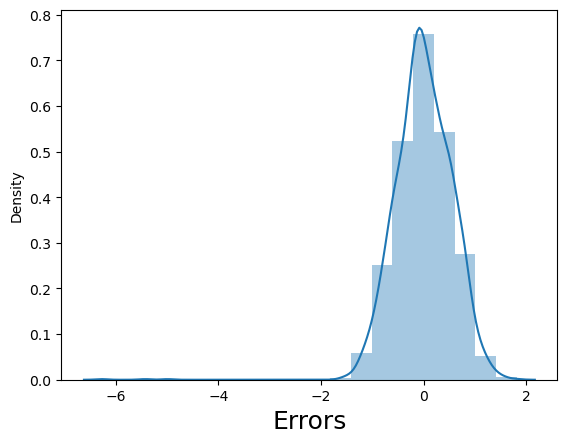

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

it is a normal curve

Feature Scaling

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
# Apply scaler() to all the columns 
scaler = StandardScaler()

X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_test[['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',\
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',\
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',\
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',\
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',\
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',\
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',\
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',\
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1',\
       'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',\
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3',\
       'HAI_4', 'HAI_5', 'HAI_6']])

X_test.head()

,Provider ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
2611,281320,0.410261,-0.975444,-1.983036,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.477095,-1.601725,-0.550893,-1.513340,-1.308649,-3.025275,-1.968806,-1.422003,-1.195449,-0.191166
492,50616,0.615955,1.131677,-0.029883,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.477095,0.669795,-0.550893,0.706526,0.883879,0.479416,0.582276,0.563308,-1.195449,-0.191166
3996,450080,0.615955,-0.975444,0.237672,0.0,0.0,0.0,0.0,0.0,0.0,...,0.717005,0.187958,-0.550893,0.389402,0.445374,-0.086999,0.123081,-1.422003,-1.195449,-0.191166
3174,360044,0.958778,-0.975444,0.184161,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.477095,0.692740,-0.550893,-0.108935,-1.308649,-0.122400,0.250635,-1.422003,-1.195449,-0.191166
3908,440120,0.410261,0.889773,0.451716,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119955,0.555072,-0.550893,0.706526,0.620776,0.019204,0.276146,0.630990,0.959169,5.198004


In [148]:
X_train_new_4.columns

Index(['const', 'PSI_90_SAFETY', 'H_COMP_6', 'HAI_1', 'OP_10', 'OP_13', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HOSP_WIDE', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1'],
      dtype='object')

In [149]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HOSP_WIDE',
       'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6', 'HAI_1']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [150]:
X_test_new

,const,PSI_90_SAFETY,OP_10,OP_13,OP_8,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,...,READM_30_COPD,READM_30_HF,READM_30_HOSP_WIDE,ED_1b,IMM_2,IMM_3,STK_1,VTE_1,H_COMP_6,HAI_1
2611,1.0,-1.983036,0.358136,-1.019885,-0.812298,-1.356729,-0.597523,-3.267758,-3.767001,0.342492,...,-3.843426,-4.343642,-0.190172,-2.090370,-3.795286,-3.555157,-1.601725,-3.025275,-3.565599,-0.567660
492,1.0,-0.029883,-0.645104,-1.019885,-0.812298,0.648890,-0.597523,0.440842,0.664660,1.096860,...,0.530412,0.156942,-0.077611,0.895466,0.015367,-0.960742,0.669795,0.479416,0.154245,-0.567660
3996,1.0,0.237672,1.531569,0.527292,1.585504,-1.356729,-0.597523,0.268349,0.632074,0.153900,...,0.060326,0.032502,-0.752978,0.102480,0.315081,-0.784850,0.187958,-0.086999,0.154245,-0.567660
3174,1.0,0.184161,-0.555529,0.131503,-0.812298,0.648890,-0.597523,0.440842,-0.084812,0.100017,...,0.203396,0.239902,0.260073,-0.326380,0.101000,0.666263,0.692740,-0.122400,0.287097,-0.567660
3908,1.0,0.451716,-0.250974,0.671216,0.643158,0.929087,3.020131,0.958321,1.120860,1.285453,...,0.407781,0.260642,-0.527856,0.725541,0.229449,-0.301146,0.555072,0.019204,0.287097,2.304962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1.0,0.210917,-0.788424,-1.019885,-0.812298,-1.356729,-0.597523,0.311472,-0.117398,0.153900,...,0.285150,-0.174898,0.260073,-0.026987,-0.840960,-3.555157,-1.601725,-0.618013,-3.565599,-0.567660
179,1.0,-1.983036,-0.788424,-1.019885,-0.812298,0.589902,-0.597523,0.138979,0.306217,0.180842,...,0.346465,-0.071198,-0.077611,-2.090370,-3.795286,-3.555157,-1.601725,-3.025275,0.021394,-0.567660
3708,1.0,-1.983036,-0.788424,-1.019885,-0.812298,0.589902,-0.597523,-0.076637,-0.149984,-0.196342,...,0.366904,1.028023,1.498246,1.372877,0.486347,-3.555157,0.463293,-3.025275,-3.565599,-0.567660
1266,1.0,-1.983036,0.331264,-1.019885,-0.812298,-1.356729,-0.597523,0.354595,0.403974,0.854385,...,0.223834,-0.195638,-1.090662,-0.213096,0.486347,0.754209,-1.601725,0.444015,0.508516,-0.567660


In [151]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

In [152]:
y_pred = y_pred.to_frame()
y_pred_final = y_pred.apply(lambda x : round(x,0))
y_pred_final[0] = y_pred_final[0].astype(int)
y_pred_final = y_pred_final.rename(columns = {list(y_pred_final)[0] :'predicted_rating'})
y_pred_final

,predicted_rating
2611,6
492,3
3996,3
3174,3
3908,3
...,...
4043,3
179,5
3708,4
1266,3


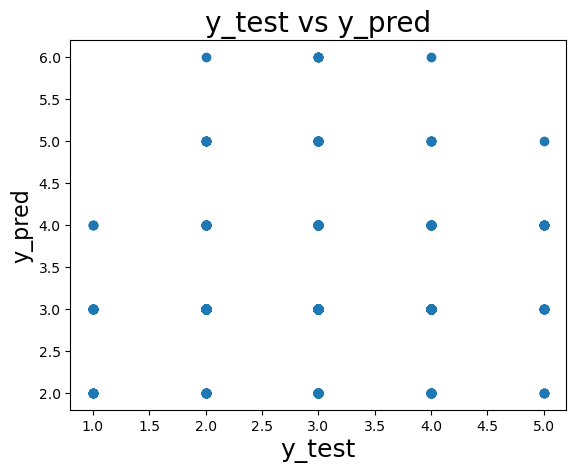

In [153]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred_final)
plt.title('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [154]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

-0.6126675331284084

In [155]:
y_pred_final = pd.concat([y_test,y_pred_final],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final

,Provider ID,Hospital overall rating,predicted_rating
2611,281320,3,6
492,50616,3,3
3996,450080,3,3
3174,360044,3,3
3908,440120,2,3
...,...,...,...
4043,450214,3,3
179,31317,3,5
3708,400114,2,4
1266,141322,4,3


In [156]:
# Let's check the overall accuracy.
import sklearn.metrics as metrics
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.3780821917808219

Lets try Logistic Regresssion

In [157]:
df_fin = df_final.fillna(0)

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(df_fin.drop(['Hospital overall rating'],axis=1))

y = df_fin['Hospital overall rating']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

simple Model

In [160]:
logr = LogisticRegression()
mod = logr.fit(X_train,y_train)
predict=mod.predict(X_train)
predict

array([2, 3, 3, ..., 3, 4, 3])

In [161]:
print(metrics.accuracy_score(y_train, predict))

0.7246376811594203


In [162]:
confusion = metrics.confusion_matrix(y_train, predict )
print(confusion)

[[ 59  29   1   0   0]
 [  9 336 139   2   0]
 [  0  88 991 145   0]
 [  0   2 238 427   8]
 [  0   0   1  41  37]]


Checking Accuracy on test set

In [163]:
predict_test=mod.predict(X_test)
predict_test

array([3, 3, 3, ..., 3, 3, 2])

In [164]:
confusion = metrics.confusion_matrix(y_test, predict_test )
print(confusion)

[[ 15  13   0   0   0]
 [  2 118  77   1   0]
 [  0  52 422  72   2]
 [  0   0 104 180   5]
 [  0   0   0  27   5]]


In [165]:
print(metrics.accuracy_score(y_test, predict_test))

0.6757990867579908


we got an accuracy of 67% from Logistic Regression

PCA & Clustering

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
df_pca = df_final.drop(['Provider ID'],axis=1)

In [168]:
df_pca.columns

Index(['Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7', 'H_HSP_RATING',
       'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5',
       'HAI_6', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'CAC_3', 'ED_1b', 'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b',
       'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3', 'OP_4', 'OP_5', 'PC_01',
       'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5',
       'VTE_6'],
      dtype='object')

In [169]:
numeric=['COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7', 'H_HSP_RATING',
       'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5',
       'HAI_6', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK', 'CAC_3', 'ED_1b', 'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b',
       'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3', 'OP_4', 'OP_5', 'PC_01',
       'STK_1', 'STK_4', 'STK_6', 'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5',
       'VTE_6']

In [170]:
scaler = StandardScaler()
df_pca[numeric] = scaler.fit_transform(df_pca[numeric])
df_pca

,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
0,3,1.106393,1.438608,-0.170633,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,0.667111,1.149144,0.730290,0.598501,0.407146,0.571611,0.645276,0.740248,-0.230822
1,3,0.551895,1.593622,0.290135,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.171870,0.644111,-0.552701,0.482154,0.883542,0.336904,0.446459,0.848032,0.956224,-0.230822
2,2,1.106393,1.870607,0.452759,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,0.667111,-0.552701,0.685174,0.664280,0.442267,0.321307,0.532634,0.783443,-0.230822
3,3,-1.527472,-0.978688,0.127511,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,0.230112,-0.552701,0.098672,-1.309085,0.407146,0.571611,-1.404807,-1.203530,-0.230822
4,3,-1.527472,-0.978688,0.425655,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,-1.609879,-0.552701,-1.502931,-1.309085,0.477388,-1.906405,-1.404807,-1.203530,-0.230822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,3,-1.527472,-0.978688,0.154615,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,0.115113,-0.552701,0.549828,0.466943,-0.646486,-0.129242,0.848032,-1.203530,-0.230822
4801,3,-1.527472,-0.978688,0.723799,0.0,0.0,0.0,0.0,0.0,0.0,...,0.366312,0.690110,-0.552701,0.752848,0.730058,0.512509,0.546581,-1.404807,-1.203530,-0.230822
4812,2,0.482583,-0.978688,-2.013706,0.0,0.0,0.0,0.0,0.0,0.0,...,2.519040,0.598111,-0.552701,0.482154,0.883542,-0.189912,0.171124,0.667805,0.675456,-0.230822
4813,2,-1.527472,-0.978688,-2.013706,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440961,-1.609879,-0.552701,-1.502931,-1.309085,-0.189912,0.546581,0.442521,-0.274836,-0.230822


In [171]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [172]:
# PCA on the data
pca.fit(df_pca)

PCA(random_state=42, svd_solver='randomized')

In [173]:
pca.components_

array([[ 6.45741528e-02, -1.38514555e-01, -2.00670915e-01, ...,
        -2.10237385e-01, -2.03259457e-01, -5.15725073e-02],
       [ 1.24763215e-01,  4.88128366e-02,  8.86693767e-02, ...,
         4.20069854e-02,  5.98947146e-02,  2.32108322e-02],
       [-1.37005844e-01, -1.50967975e-01,  1.05829934e-01, ...,
        -8.04782812e-02, -2.76423096e-02,  1.02118603e-01],
       ...,
       [-0.00000000e+00, -2.49800181e-16, -1.35088495e-16, ...,
         3.46944695e-17, -1.38777878e-17, -1.07552856e-16],
       [ 0.00000000e+00,  5.55111512e-17,  4.50539358e-17, ...,
         1.04083409e-16,  0.00000000e+00, -2.77555756e-17],
       [ 0.00000000e+00,  1.17961196e-16,  2.67843553e-17, ...,
        -8.67361738e-18,  1.44849410e-16,  1.90819582e-17]])

In [174]:
pca.explained_variance_ratio_

array([2.84331299e-01, 8.55267758e-02, 5.65983904e-02, 5.30322365e-02,
       3.14823526e-02, 2.58180299e-02, 2.50031575e-02, 2.17934022e-02,
       2.03010062e-02, 1.93057632e-02, 1.87816394e-02, 1.76088588e-02,
       1.72909134e-02, 1.67209737e-02, 1.59104113e-02, 1.56638545e-02,
       1.50940595e-02, 1.48694872e-02, 1.44716411e-02, 1.34046742e-02,
       1.32699869e-02, 1.25144199e-02, 1.20422409e-02, 1.14248448e-02,
       1.11253161e-02, 1.08238272e-02, 1.07539340e-02, 1.03914501e-02,
       9.98164588e-03, 9.80236592e-03, 9.47051334e-03, 9.36905142e-03,
       9.08566435e-03, 8.38844757e-03, 7.27047533e-03, 7.10357246e-03,
       6.33209553e-03, 5.89081673e-03, 5.38919136e-03, 4.80613668e-03,
       4.27314966e-03, 4.04580114e-03, 3.28018262e-03, 3.09102858e-03,
       2.86105617e-03, 2.66295806e-03, 2.50090485e-03, 2.47156166e-03,
       1.66670623e-03, 1.40601556e-03, 1.36403825e-03, 1.21912358e-03,
       9.12550439e-04, 5.60744615e-32, 1.48048062e-33, 1.48048062e-33,
      

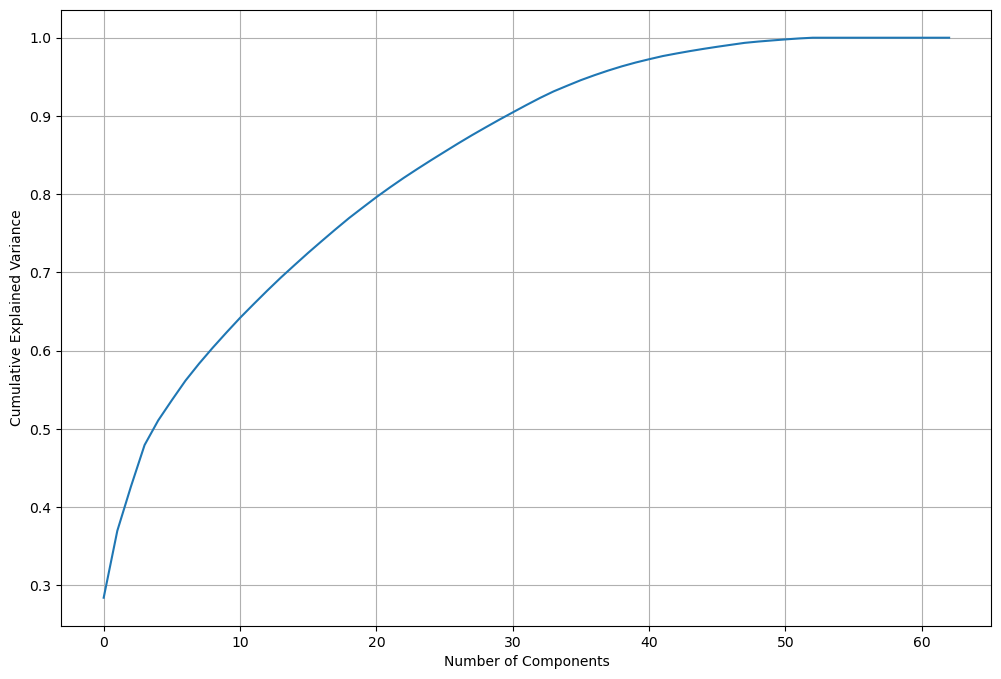

In [175]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Choosing PC as 30 since it gives around 91% variance

In [176]:
colnames = list(df_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.064574,0.124763,Hospital overall rating
1,-0.138515,0.048813,COMP_HIP_KNEE
2,-0.200671,0.088669,PSI_4_SURG_COMP
3,-0.160433,0.080013,PSI_90_SAFETY
4,-0.000000,0.000000,H_CLEAN_HSP
...,...,...,...
58,-0.134703,0.083301,VTE_1
59,-0.196805,-0.007679,VTE_2
60,-0.210237,0.042007,VTE_3
61,-0.203259,0.059895,VTE_5


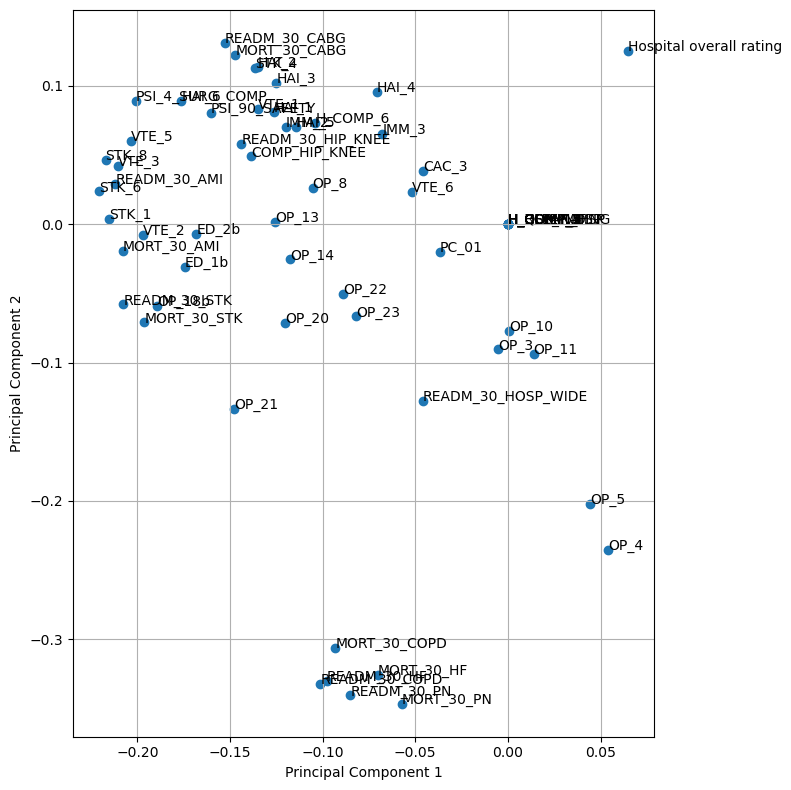

In [177]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [178]:
#Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [179]:
df_train_pca = pca_final.fit_transform(df_pca)
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,-0.450322,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,-3.311121,0.011900,-1.678899,-1.457666,-2.711159,0.673154,-1.814711,0.254029,-0.910994,1.833321,...,0.123975,-0.209326,-0.434375,0.031512,-0.624519,-0.194083,-0.771451,-0.973628,1.313319,-0.149693
3644,-3.303744,-0.510535,-1.685077,1.118169,-2.140828,0.516082,-1.731890,0.185659,-0.535292,0.606187,...,-1.984177,-0.552006,-0.111910,-1.415965,0.056535,-0.020362,0.018334,0.203857,-0.257111,0.024916
3645,-0.399082,-0.466293,-1.726477,-0.700595,-3.624054,3.342950,0.183529,1.823338,1.453891,2.322988,...,1.287594,1.491833,1.033365,1.508300,0.465445,0.050209,-1.109938,1.070738,0.101682,1.561750
3646,-2.937602,0.891899,-3.248474,-2.037931,-2.721112,1.425755,-0.804616,-0.321880,-0.359798,1.204052,...,0.005828,-1.401268,0.232699,0.750586,-0.124765,0.405317,-0.695474,1.480968,-0.386264,-0.115498


In [180]:
corrmat = np.corrcoef(df_train_pca.transpose())

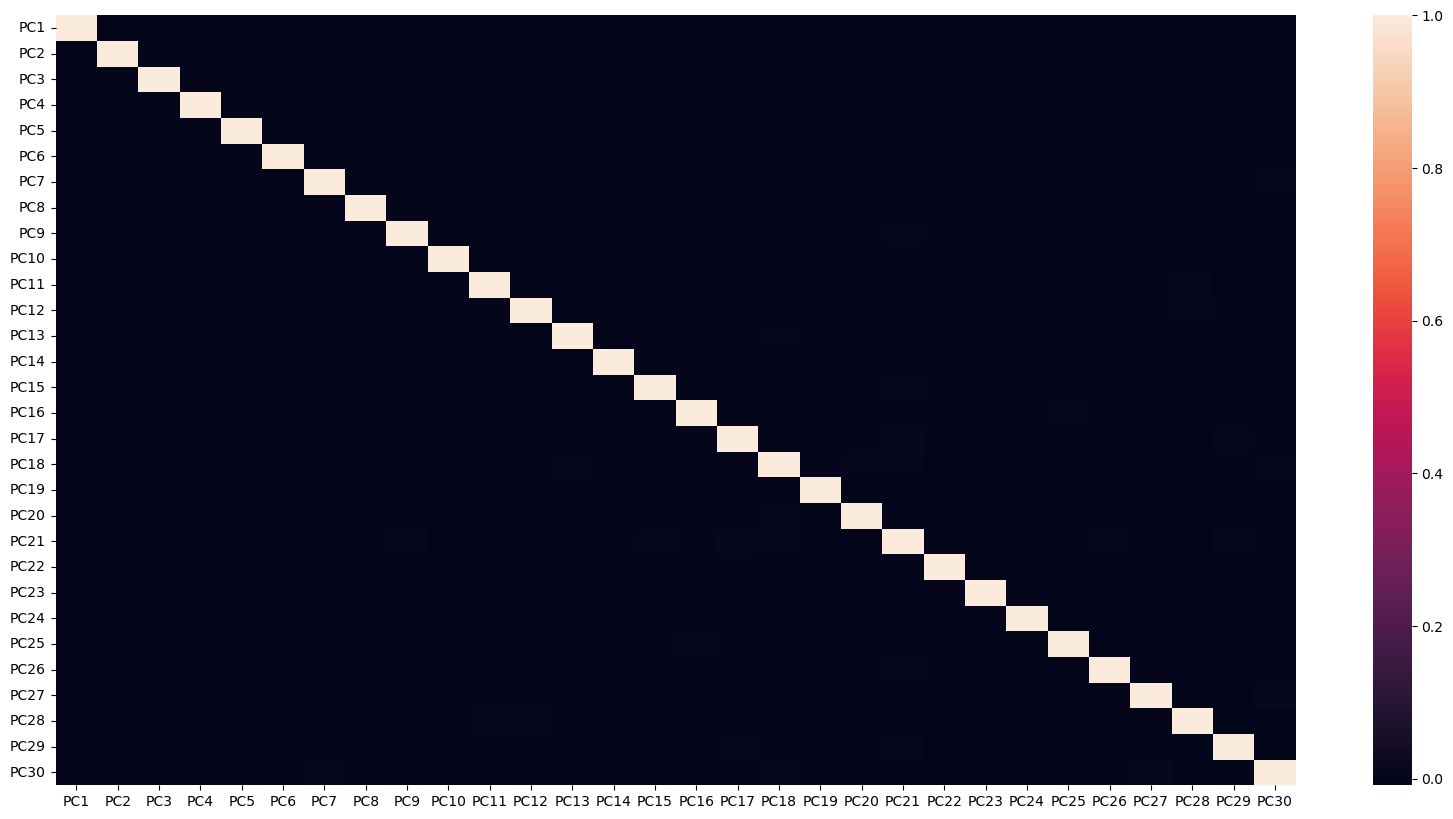

In [181]:
plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr())
plt.show()

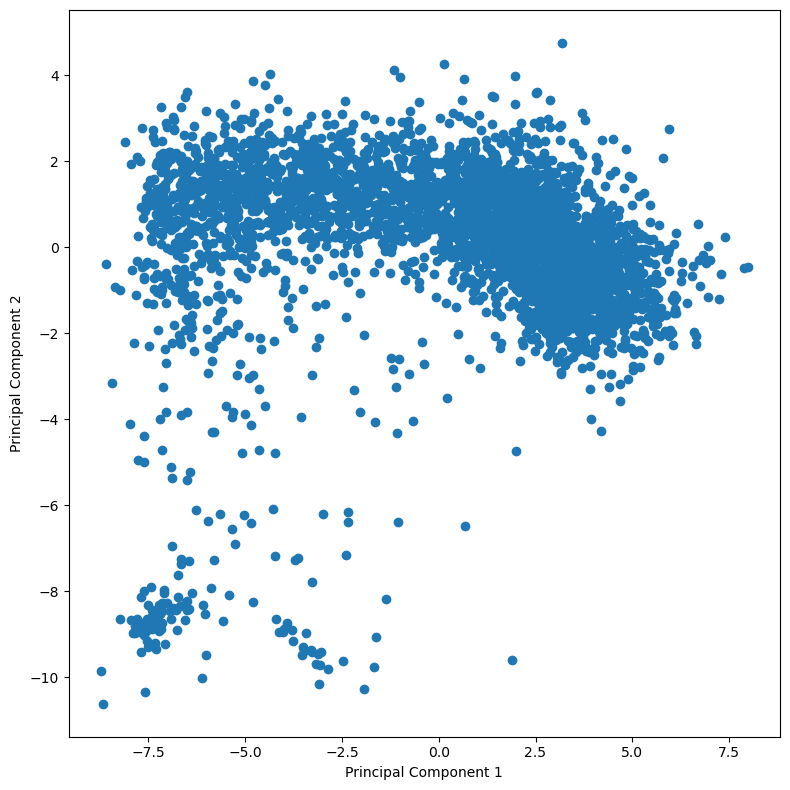

In [182]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [183]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum correlation:",corrmat_nodiag.max(), ", minimum correlation: ", corrmat_nodiag.min(),)

maximum correlation: 0.008905082481963577 , minimum correlation:  -0.008789390255055367


In [184]:
provider = pd.DataFrame(df_final['Provider ID'])
provider.reset_index(inplace = True,drop = True)
provider

,Provider ID
0,10001
1,10005
2,10006
3,10007
4,10008
...,...
3643,670096
3644,670098
3645,480001
3646,480002


In [185]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,-0.450322,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,-3.311121,0.011900,-1.678899,-1.457666,-2.711159,0.673154,-1.814711,0.254029,-0.910994,1.833321,...,0.123975,-0.209326,-0.434375,0.031512,-0.624519,-0.194083,-0.771451,-0.973628,1.313319,-0.149693
3644,-3.303744,-0.510535,-1.685077,1.118169,-2.140828,0.516082,-1.731890,0.185659,-0.535292,0.606187,...,-1.984177,-0.552006,-0.111910,-1.415965,0.056535,-0.020362,0.018334,0.203857,-0.257111,0.024916
3645,-0.399082,-0.466293,-1.726477,-0.700595,-3.624054,3.342950,0.183529,1.823338,1.453891,2.322988,...,1.287594,1.491833,1.033365,1.508300,0.465445,0.050209,-1.109938,1.070738,0.101682,1.561750
3646,-2.937602,0.891899,-3.248474,-2.037931,-2.721112,1.425755,-0.804616,-0.321880,-0.359798,1.204052,...,0.005828,-1.401268,0.232699,0.750586,-0.124765,0.405317,-0.695474,1.480968,-0.386264,-0.115498


In [186]:
df_pca = pd.concat([provider, df_pca], axis=1)
df_pca

,Provider ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,10001,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,10005,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,10006,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,10007,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,10008,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,670096,-3.311121,0.011900,-1.678899,-1.457666,-2.711159,0.673154,-1.814711,0.254029,-0.910994,...,0.123975,-0.209326,-0.434375,0.031512,-0.624519,-0.194083,-0.771451,-0.973628,1.313319,-0.149693
3644,670098,-3.303744,-0.510535,-1.685077,1.118169,-2.140828,0.516082,-1.731890,0.185659,-0.535292,...,-1.984177,-0.552006,-0.111910,-1.415965,0.056535,-0.020362,0.018334,0.203857,-0.257111,0.024916
3645,480001,-0.399082,-0.466293,-1.726477,-0.700595,-3.624054,3.342950,0.183529,1.823338,1.453891,...,1.287594,1.491833,1.033365,1.508300,0.465445,0.050209,-1.109938,1.070738,0.101682,1.561750
3646,480002,-2.937602,0.891899,-3.248474,-2.037931,-2.721112,1.425755,-0.804616,-0.321880,-0.359798,...,0.005828,-1.401268,0.232699,0.750586,-0.124765,0.405317,-0.695474,1.480968,-0.386264,-0.115498


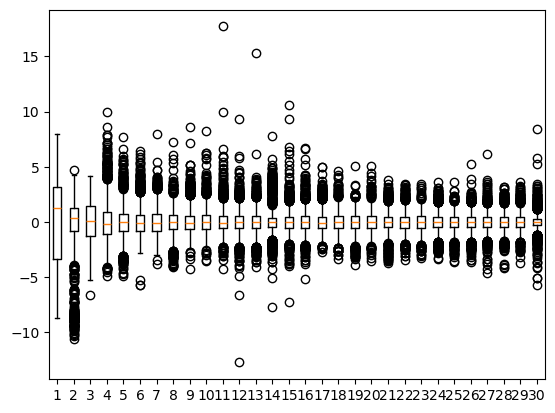

In [187]:
plt.boxplot(df_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']])
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]
plt.show()

In [188]:
df_pca.shape

(3648, 31)

In [189]:
# Making provider dataset
provider_1 = pd.DataFrame(df_pca["Provider ID"])

In [190]:
# Dropping provider to proceed with clustering
df_pca = df_pca.drop(['Provider ID'],axis=1)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.427481,-1.120923,-2.548290,0.447019,2.133258,-1.712844,0.566260,0.438519,-0.165055,-0.450322,...,0.336660,-1.503012,0.399244,0.690113,1.154693,1.108973,-1.511086,1.675995,-0.023504,-0.006194
1,2.523057,1.535194,2.072356,-0.974311,1.071333,0.740672,0.924230,-0.603819,-1.210139,-0.249087,...,0.017987,0.520117,-0.631096,0.234696,0.208867,-0.478368,-1.099142,0.636289,0.864221,0.088463
2,3.159210,-0.411730,-1.003491,-2.047033,0.982577,1.072525,-1.088508,0.181333,-0.273746,-1.202890,...,-1.342731,1.027495,0.112044,1.175422,-1.026101,-0.249708,-0.727875,0.521395,0.716684,1.030721
3,-2.209012,2.869897,0.413703,1.718694,0.877342,1.093745,-1.837763,-0.365285,0.228626,0.702780,...,0.314153,-0.367608,0.844359,0.273561,0.366564,-0.901863,1.309857,0.612574,-0.493739,-0.058538
4,-5.197569,0.840449,-2.087396,1.451486,-0.390197,-0.789553,-2.116200,0.488144,0.323963,-0.860497,...,-1.178240,-0.701378,-0.822633,0.448409,0.156849,-0.224975,0.171658,0.350553,-1.453870,-0.235723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,-3.311121,0.011900,-1.678899,-1.457666,-2.711159,0.673154,-1.814711,0.254029,-0.910994,1.833321,...,0.123975,-0.209326,-0.434375,0.031512,-0.624519,-0.194083,-0.771451,-0.973628,1.313319,-0.149693
3644,-3.303744,-0.510535,-1.685077,1.118169,-2.140828,0.516082,-1.731890,0.185659,-0.535292,0.606187,...,-1.984177,-0.552006,-0.111910,-1.415965,0.056535,-0.020362,0.018334,0.203857,-0.257111,0.024916
3645,-0.399082,-0.466293,-1.726477,-0.700595,-3.624054,3.342950,0.183529,1.823338,1.453891,2.322988,...,1.287594,1.491833,1.033365,1.508300,0.465445,0.050209,-1.109938,1.070738,0.101682,1.561750
3646,-2.937602,0.891899,-3.248474,-2.037931,-2.721112,1.425755,-0.804616,-0.321880,-0.359798,1.204052,...,0.005828,-1.401268,0.232699,0.750586,-0.124765,0.405317,-0.695474,1.480968,-0.386264,-0.115498


Hopkins Statistics
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. If the values are:

0.01 - 0.3 : Low chase of clustering
around 0.5 : Random
0.7 - 0.99 : High chance of clustering

In [191]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [192]:
hopkins(df_pca)

0.860854221304179

Since the value is 0.85 and is between 0.7 - 0.99, there is a high chance of clustering to be formed

K-Means

In [193]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [194]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(df_pca)

KMeans(max_iter=50, n_clusters=3)

Silhouette Analysis
Value of the silhouette score range is in between -1 to 1.
A score closer to 1 : The data point is very similar to other data points in the cluster
A score closer to -1 : The data point is not similar to the data points in its cluster.

In [195]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

In [196]:
no_of_clusters = [2, 3, 4, 5, 6]
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(df_pca) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(df_pca, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.26144590873706247
For no of clusters = 3  The average silhouette_score is : 0.26098022350988154
For no of clusters = 4  The average silhouette_score is : 0.16287248343977695
For no of clusters = 5  The average silhouette_score is : 0.13793342881108925
For no of clusters = 6  The average silhouette_score is : 0.12676071226475827


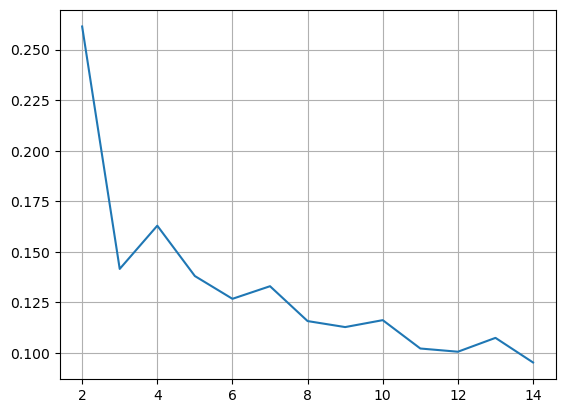

In [197]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

In [ ]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

In [ ]:
plt.plot(ssd)
plt.grid()
plt.show()

In [ ]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [ ]:
df_pca.index = pd.RangeIndex(len(df_pca.index))
df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)
df_pca_km.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30', 'ClusterID']
df_pca_km

In [ ]:
df_pca_km

In [ ]:
# Merging country and the above data set
df_pca_km = pd.merge(df_pca_km, provider_1, on = df_pca_km['PC1'],how="right")
df_pca_km = df_pca_km.drop('key_0', axis=1)
df_pca_km

In [ ]:
df_pca

In [ ]:
provider_1

In [ ]:
df_provider_clusterid = pd.merge(df_pca_km,df_final,on='Provider ID',how='inner')
df_provider_clusterid

In [ ]:
df_provider_clusterid = df_provider_clusterid.rename(columns = {'Provider ID' : 'Provider_ID', 'Hospital overall rating' : 'Hospital_overall_rating'})

In [ ]:
km_clusters_PC1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC5.mean())
km_clusters_PC6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC6.mean())
km_clusters_PC7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC7.mean())
km_clusters_PC8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC8.mean())
km_clusters_PC9 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC9.mean())
km_clusters_PC10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC10.mean())
km_clusters_PC11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC11.mean())
km_clusters_PC12 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC12.mean())
km_clusters_PC13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC13.mean())
km_clusters_PC14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC14.mean())
km_clusters_PC15 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC15.mean())
km_clusters_PC16 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC16.mean())
km_clusters_PC17 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC17.mean())
km_clusters_PC18 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC18.mean())
km_clusters_PC19 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC19.mean())
km_clusters_PC20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC20.mean())
km_clusters_PC21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC21.mean())
km_clusters_PC22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC22.mean())
km_clusters_PC23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC23.mean())
km_clusters_PC24 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC24.mean())
km_clusters_PC25 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC25.mean())
km_clusters_PC26 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC26.mean())
km_clusters_PC27 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC27.mean())
km_clusters_PC28 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC28.mean())
km_clusters_PC29 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC29.mean())
km_clusters_PC30 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC30.mean())
km_clusters_Hospital_overall_rating = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).Hospital_overall_rating.mean())
km_clusters_COMP_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).COMP_HIP_KNEE.mean())
km_clusters_PSI_4_SURG_COMP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_4_SURG_COMP.mean())
km_clusters_PSI_90_SAFETY = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PSI_90_SAFETY.mean())
km_clusters_OP_10 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_10.mean())
km_clusters_OP_11 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_11.mean())
km_clusters_OP_13 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_13.mean())
km_clusters_OP_14 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_14.mean())
km_clusters_OP_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_8.mean())
km_clusters_MORT_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_AMI.mean())
km_clusters_MORT_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_CABG.mean())
km_clusters_MORT_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_COPD.mean())
km_clusters_MORT_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_HF.mean())
km_clusters_MORT_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_PN.mean())
km_clusters_MORT_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).MORT_30_STK.mean())
km_clusters_READM_30_AMI = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_AMI.mean())
km_clusters_READM_30_CABG = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_CABG.mean())
km_clusters_READM_30_COPD = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_COPD.mean())
km_clusters_READM_30_HF = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HF.mean())
km_clusters_READM_30_HIP_KNEE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HIP_KNEE.mean())
km_clusters_READM_30_HOSP_WIDE = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_HOSP_WIDE.mean())
km_clusters_READM_30_PN = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_PN.mean())
km_clusters_READM_30_STK = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).READM_30_STK.mean())
km_clusters_CAC_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).CAC_3.mean())
km_clusters_ED_1b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_1b.mean())
km_clusters_ED_2b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).ED_2b.mean())
km_clusters_IMM_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_2.mean())
km_clusters_IMM_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).IMM_3.mean())
km_clusters_OP_18b = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_18b.mean())
km_clusters_OP_20 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_20.mean())
km_clusters_OP_21 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_21.mean())
km_clusters_OP_22 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_22.mean())
km_clusters_OP_23 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_23.mean())
km_clusters_OP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_3.mean())
km_clusters_OP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_4.mean())
km_clusters_OP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).OP_5.mean())
km_clusters_PC_01 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).PC_01.mean())
km_clusters_STK_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_1.mean())
km_clusters_STK_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_4.mean())
km_clusters_STK_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_6.mean())
km_clusters_STK_8 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).STK_8.mean())
km_clusters_VTE_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_1.mean())
km_clusters_VTE_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_2.mean())
km_clusters_VTE_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_3.mean())
km_clusters_VTE_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_5.mean())
km_clusters_VTE_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).VTE_6.mean())
km_clusters_H_CLEAN_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_CLEAN_HSP.mean())
km_clusters_H_COMP_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_1.mean())
km_clusters_H_COMP_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_2.mean())
km_clusters_H_COMP_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_3.mean())
km_clusters_H_COMP_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_4.mean())
km_clusters_H_COMP_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_5.mean())
km_clusters_H_COMP_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_6.mean())
km_clusters_H_COMP_7 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_COMP_7.mean())
km_clusters_H_HSP_RATING = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_HSP_RATING.mean())
km_clusters_H_QUIET_HSP = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_QUIET_HSP.mean())
km_clusters_H_RECMND = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).H_RECMND.mean())
km_clusters_HAI_1 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_1.mean())
km_clusters_HAI_2 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_2.mean())
km_clusters_HAI_3 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_3.mean())
km_clusters_HAI_4 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_4.mean())
km_clusters_HAI_5 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_5.mean())
km_clusters_HAI_6 = pd.DataFrame(df_provider_clusterid.groupby(["ClusterID"]).HAI_6.mean())

In [ ]:
df = pd.concat([ pd.Series([0,1,2]),km_clusters_PC1 ,km_clusters_PC2 ,km_clusters_PC3 ,km_clusters_PC4 ,km_clusters_PC5 ,km_clusters_PC6 ,km_clusters_PC7 ,km_clusters_PC8 ,km_clusters_PC9 ,km_clusters_PC10 ,km_clusters_PC11 ,km_clusters_PC12 ,km_clusters_PC13 ,km_clusters_PC14 ,km_clusters_PC15 ,km_clusters_PC16 ,km_clusters_PC17 ,km_clusters_PC18 ,km_clusters_PC19 ,km_clusters_PC20 ,km_clusters_PC21 ,km_clusters_PC22 ,km_clusters_PC23 ,km_clusters_PC24 ,km_clusters_PC25 ,km_clusters_PC26 ,km_clusters_PC27 ,km_clusters_PC28 ,km_clusters_PC29 ,km_clusters_PC30 ,km_clusters_Hospital_overall_rating ,km_clusters_COMP_HIP_KNEE ,km_clusters_PSI_4_SURG_COMP ,km_clusters_PSI_90_SAFETY ,km_clusters_OP_10 ,km_clusters_OP_11 ,km_clusters_OP_13 ,km_clusters_OP_14 ,km_clusters_OP_8 ,km_clusters_MORT_30_AMI ,km_clusters_MORT_30_CABG ,km_clusters_MORT_30_COPD ,km_clusters_MORT_30_HF ,km_clusters_MORT_30_PN ,km_clusters_MORT_30_STK ,km_clusters_READM_30_AMI ,km_clusters_READM_30_CABG ,km_clusters_READM_30_COPD ,km_clusters_READM_30_HF ,km_clusters_READM_30_HIP_KNEE ,km_clusters_READM_30_HOSP_WIDE ,km_clusters_READM_30_PN ,km_clusters_READM_30_STK ,km_clusters_CAC_3 ,km_clusters_ED_1b ,km_clusters_ED_2b ,km_clusters_IMM_2 ,km_clusters_IMM_3 ,km_clusters_OP_18b ,km_clusters_OP_20 ,km_clusters_OP_21 ,km_clusters_OP_22 ,km_clusters_OP_23 ,km_clusters_OP_3 ,km_clusters_OP_4 ,km_clusters_OP_5 ,km_clusters_PC_01 ,km_clusters_STK_1 ,km_clusters_STK_4 ,km_clusters_STK_6 ,km_clusters_STK_8 ,km_clusters_VTE_1 ,km_clusters_VTE_2 ,km_clusters_VTE_3 ,km_clusters_VTE_5 ,km_clusters_VTE_6 ,km_clusters_H_CLEAN_HSP ,km_clusters_H_COMP_1 ,km_clusters_H_COMP_2 ,km_clusters_H_COMP_3 ,km_clusters_H_COMP_4 ,km_clusters_H_COMP_5 ,km_clusters_H_COMP_6 ,km_clusters_H_COMP_7 ,km_clusters_H_HSP_RATING ,km_clusters_H_QUIET_HSP ,km_clusters_H_RECMND ,km_clusters_HAI_1 ,km_clusters_HAI_2 ,km_clusters_HAI_3 ,km_clusters_HAI_4 ,km_clusters_HAI_5 ,km_clusters_HAI_6],axis = 1)
df.columns = ['ClusterID','PC1_mean', 'PC2_mean', 'PC3_mean', 'PC4_mean', 'PC5_mean', 'PC6_mean', 'PC7_mean', 'PC8_mean', 'PC9_mean', 'PC10_mean','PC11_mean', 'PC12_mean', 'PC13_mean', 'PC14_mean','PC15_mean', 'PC16_mean', 'PC17_mean', 'PC18_mean', 'PC19_mean','PC20_mean', 'PC21_mean', 'PC22_mean', 'PC23_mean', 'PC24_mean', 'PC25_mean', 'PC26_mean', 'PC27_mean', 'PC28_mean','PC29_mean', 'PC30_mean',  'Hospital_overall_rating_mean','COMP_HIP_KNEE_mean', 'PSI_4_SURG_COMP_mean', 'PSI_90_SAFETY_mean', 'OP_10_mean', 'OP_11_mean','OP_13_mean', 'OP_14_mean', 'OP_8_mean', 'MORT_30_AMI_mean','MORT_30_CABG_mean', 'MORT_30_COPD_mean','MORT_30_HF_mean', 'MORT_30_PN_mean', 'MORT_30_STK_mean', 'READM_30_AMI_mean','READM_30_CABG_mean', 'READM_30_COPD_mean', 'READM_30_HF_mean', 'READM_30_HIP_KNEE_mean','READM_30_HOSP_WIDE_mean', 'READM_30_PN_mean','READM_30_STK_mean', 'CAC_3_mean', 'ED_1b_mean','ED_2b_mean', 'IMM_2_mean', 'IMM_3_mean', 'OP_18b_mean','OP_20_mean', 'OP_21_mean', 'OP_22_mean', 'OP_23_mean','OP_3_mean', 'OP_4_mean', 'OP_5_mean', 'PC_01_mean', 'STK_1_mean', 'STK_4_mean', 'STK_6_mean', 'STK_8_mean','VTE_1_mean', 'VTE_2_mean', 'VTE_3_mean', 'VTE_5_mean','VTE_6_mean', 'H_CLEAN_HSP_mean', 'H_COMP_1_mean','H_COMP_2_mean', 'H_COMP_3_mean', 'H_COMP_4_mean','H_COMP_5_mean', 'H_COMP_6_mean', 'H_COMP_7_mean','H_HSP_RATING_mean', 'H_QUIET_HSP_mean','H_RECMND_mean', 'HAI_1_mean', 'HAI_2_mean', 'HAI_3_mean','HAI_4_mean', 'HAI_5_mean', 'HAI_6_mean']
df

In [ ]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.PC3_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.HAI_6_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.HAI_5_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.HAI_3_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.VTE_5_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.VTE_6_mean)
plt.show()

In [ ]:
sns.barplot(x=df.ClusterID, y=df.H_COMP_6_mean)
plt.show()

Looks like Cluster 0 has the lowest values among others.

In [ ]:
df1 = df_provider_clusterid.loc[df_provider_clusterid['ClusterID'] == 0]
result = pd.DataFrame(df1['Provider_ID'])
result

Recommendations for Hospital

Recommendation to EVANSTON HOSPITAL is to improve on below parameter in order to increrase the rating to atleast 4 by next year:
• Readmission (Hospital wide all cause unplanned readmission)

• Patient Experience (Discharge Information)

• Mortality (Pueumonia, Chronic Obstructive Pulmonary Disease, Heart Failure Mortality rate)

• Timeliness of Care (Median Time fo ED Dep for admitted ED patients)

• Effectiveness of Care (Influenza Immunization and Healtcare personnel Influenza Vaccination)

Validate the Measure values for Evanston Hospital

In [ ]:
df_evanston = df_final[df_final['Provider ID'] == 140010]

In [ ]:
df_evanston_imp_measure = df_evanston[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]

In [ ]:
df_4 = df_final[df_final['Hospital overall rating'] == 4]

In [ ]:
df_4_imp_measure = df_4[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
df_4_imp_measure.describe()

Validate the score of Important Measure for Evanston Hospital

In [ ]:
df_evanston_imp_measure

From the above values for important feature we can see that if Evanston Hospital improve on few measures, it can improve it's rating from 3 to 4 atleast
PSI_90_SAFETY from 1.45 to 0.62
H_COMP_6 from 84 to 85.7
MORT_30_PN from 13 to 14.9
READM_30_PN from 16.6 to 15.85
READM_30_HF from 21.2 to 19.93
MORT_30_HF from 9.5 to 11.02
MORT_30_COPD from 5.7 to 7.1
ED_2b FROM 76 to 77.4
ED_1b from 245 to 223

Hence, Evanston Hospital should improve on :
Safety
Re-admission
Mortality
Timeliness of Care